Copyright © 2025 Technical University of Denmark

In [1]:
from os import chdir
chdir('../')

In [2]:
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

from catprep import get_input_sq_cat
from breeding import sim_breeding_circuit
from lcg_plus.effective_sqz import effective_sqz
from lcg_plus.conversions import Delta_to_dB, dB_to_Delta

hbar = 2
colwidth = 3.41667


In [3]:
dB_to_Delta(9.75)

0.3254617834980459

# Data processing and convergence plots

ft_threshold 0.3254617834980459
num 2, eta 1.0


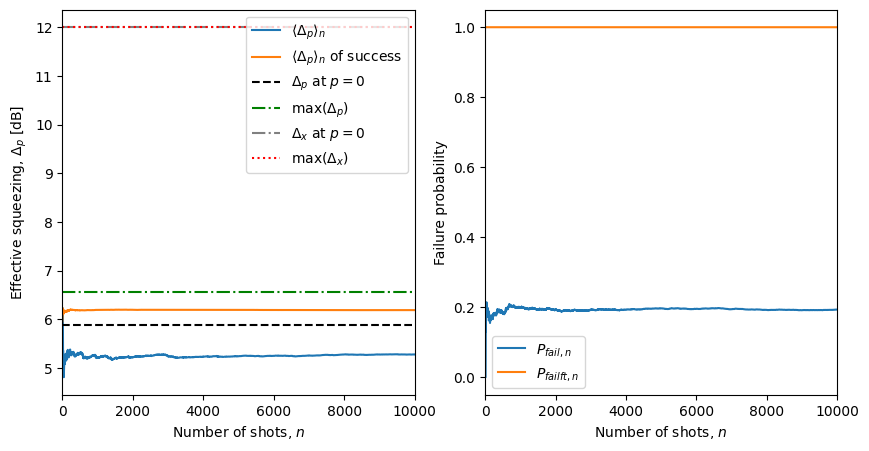

num 2, eta 0.99


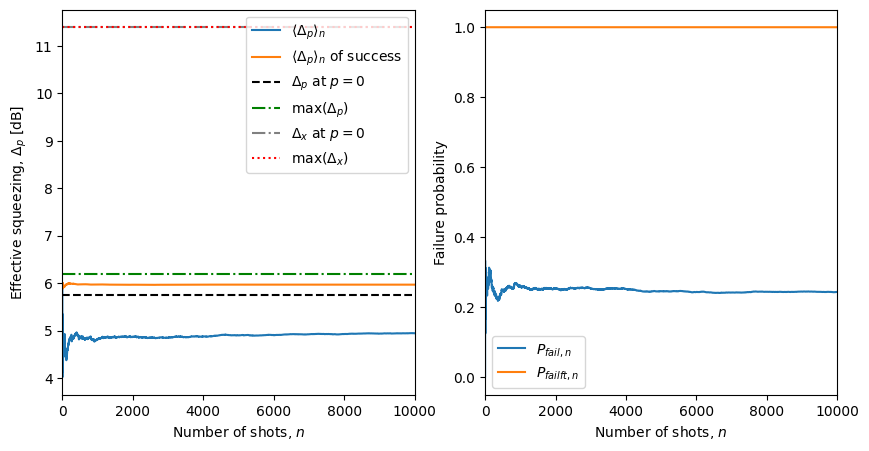

num 2, eta 0.98


/Users/s163967/venv/241104-bp/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/s163967/venv/241104-bp/lib/python3.12/site-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


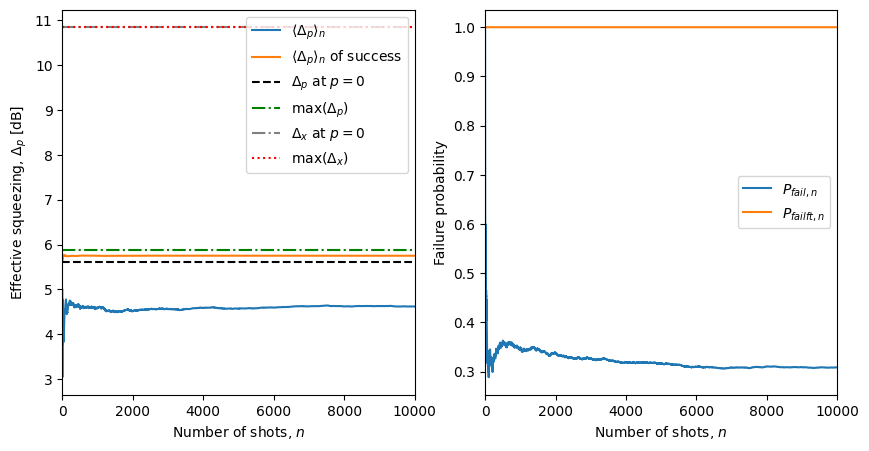

num 2, eta 0.97


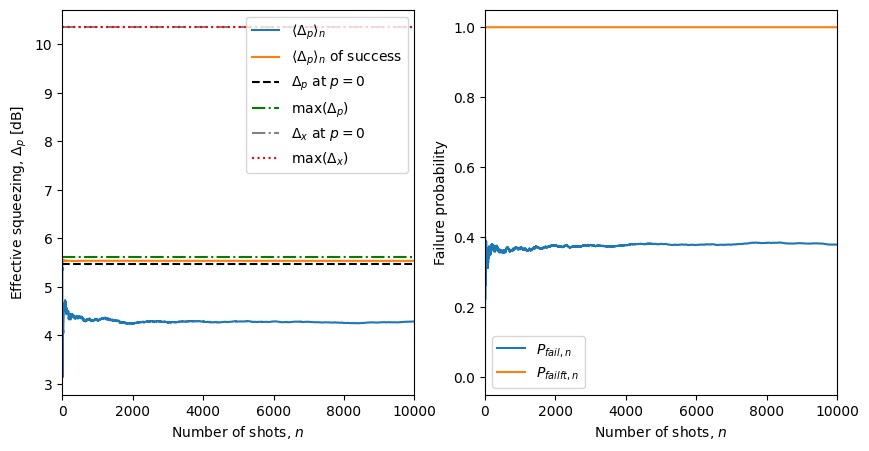

num 2, eta 0.96


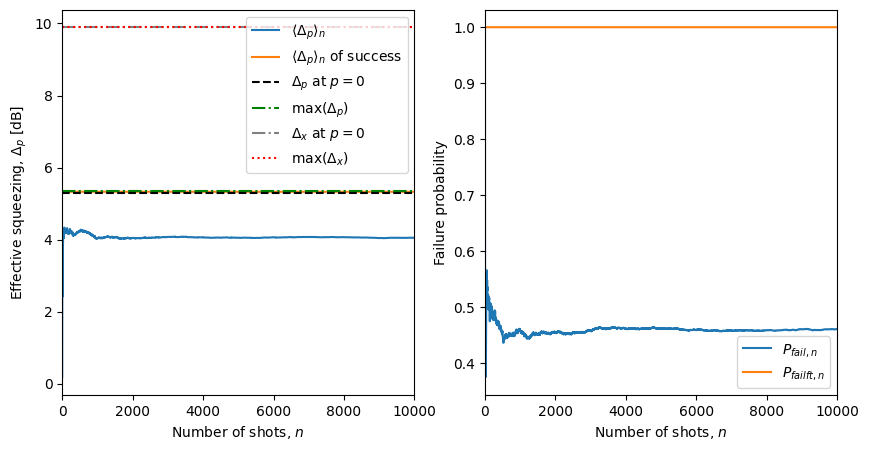

num 2, eta 0.95


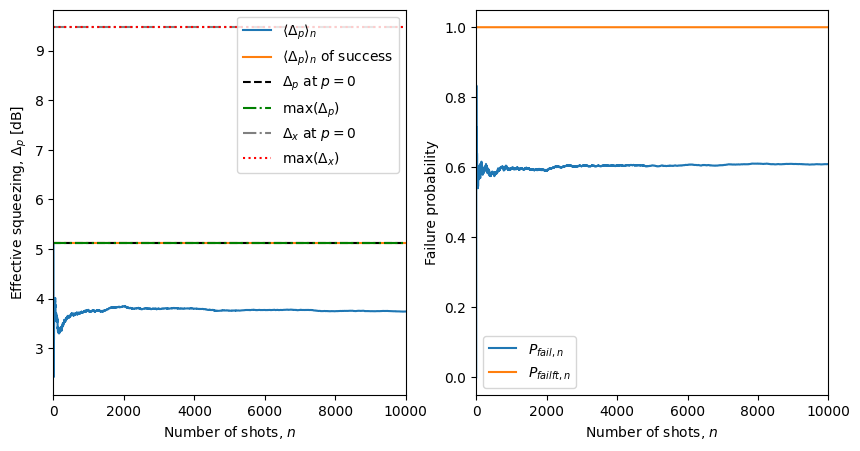

num 3, eta 1.0


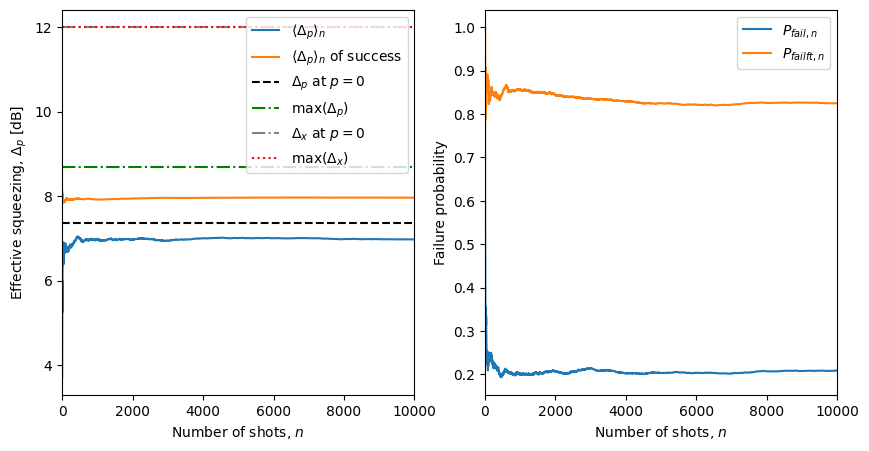

num 3, eta 0.99


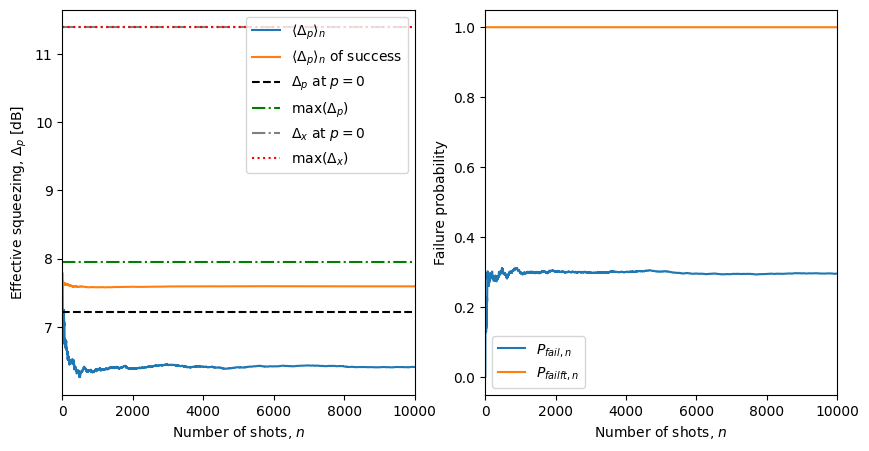

num 3, eta 0.98


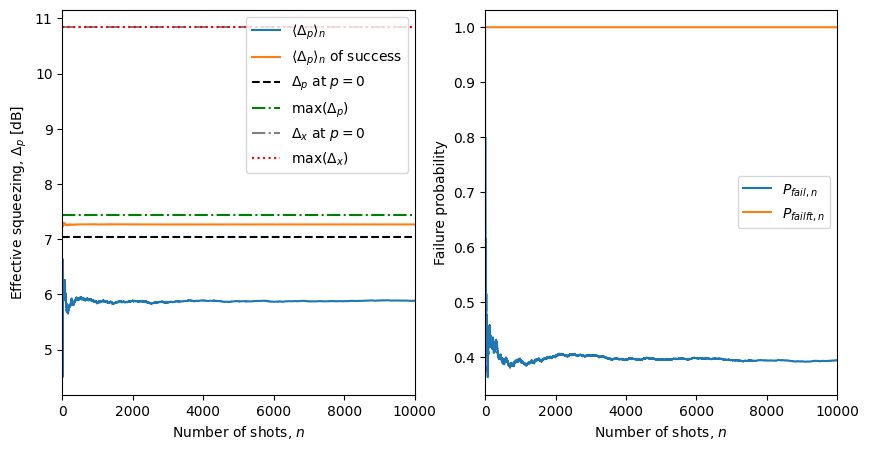

num 3, eta 0.97


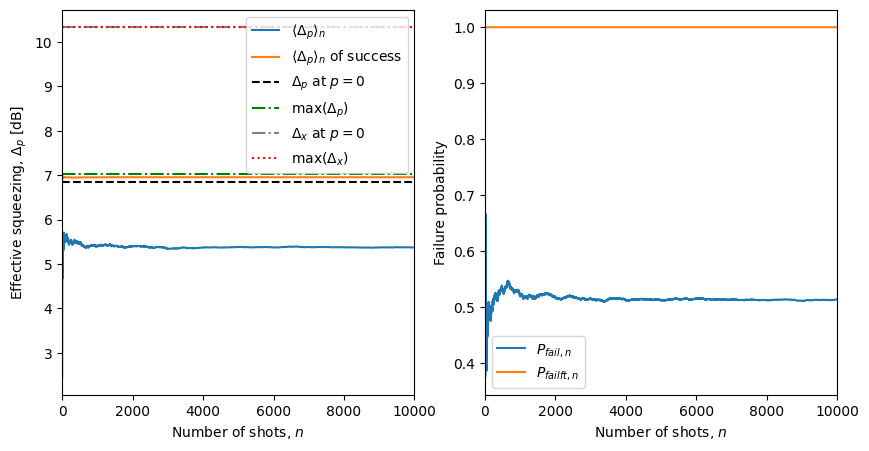

num 3, eta 0.96


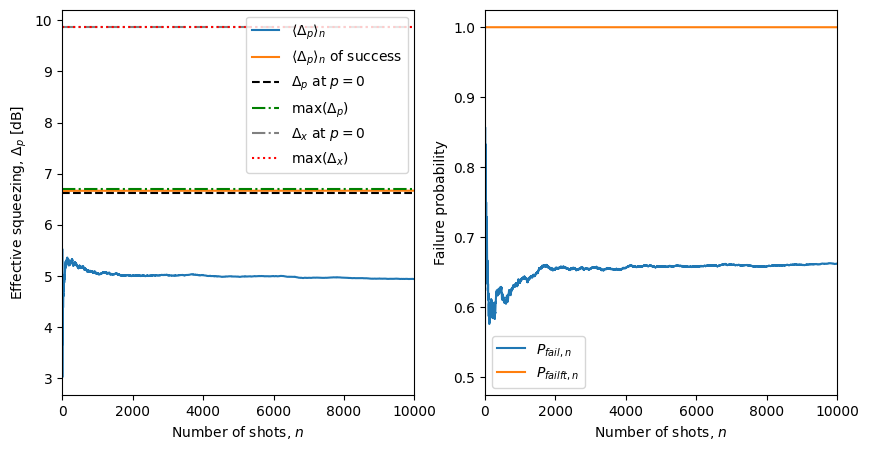

num 3, eta 0.95


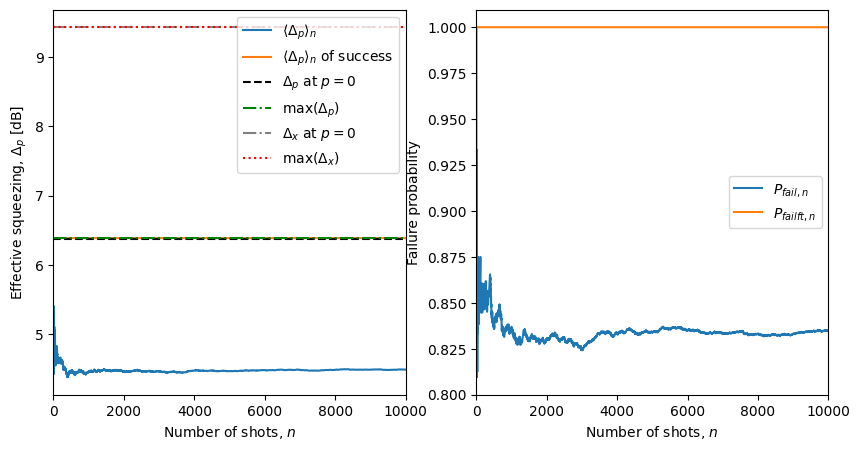

num 4, eta 1.0


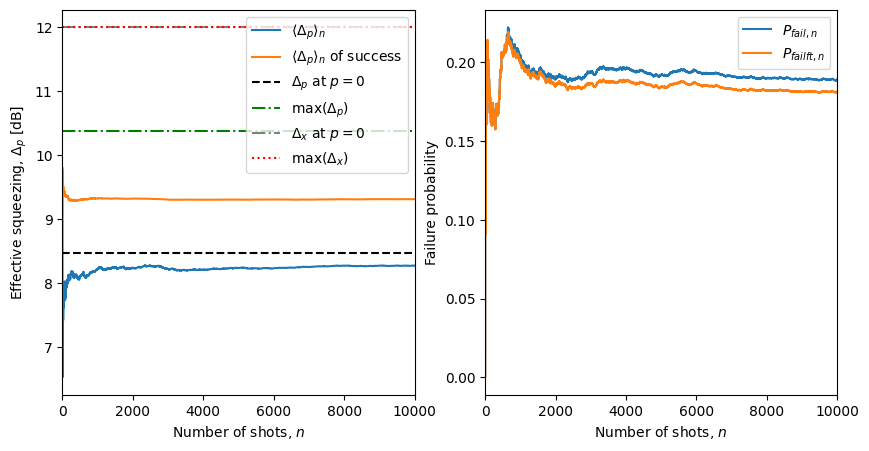

num 4, eta 0.99


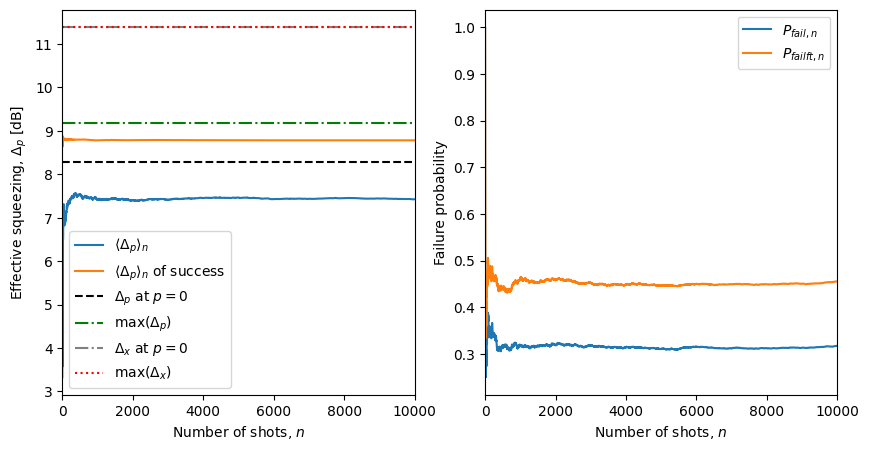

num 4, eta 0.98


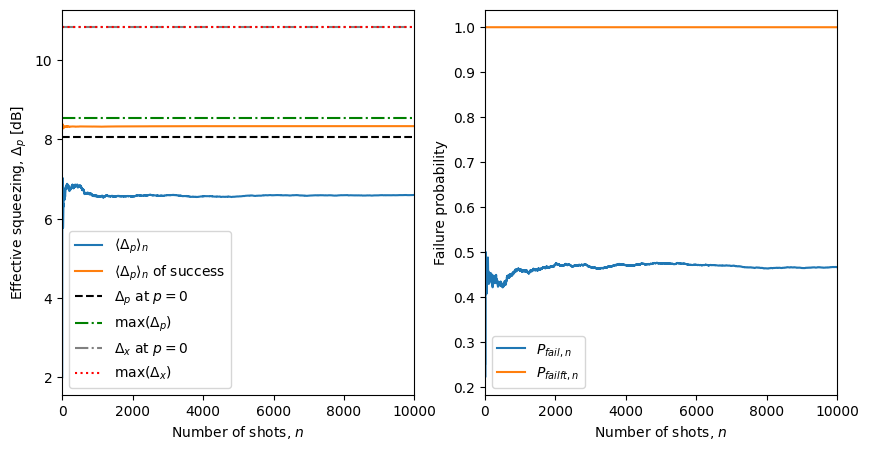

num 4, eta 0.97


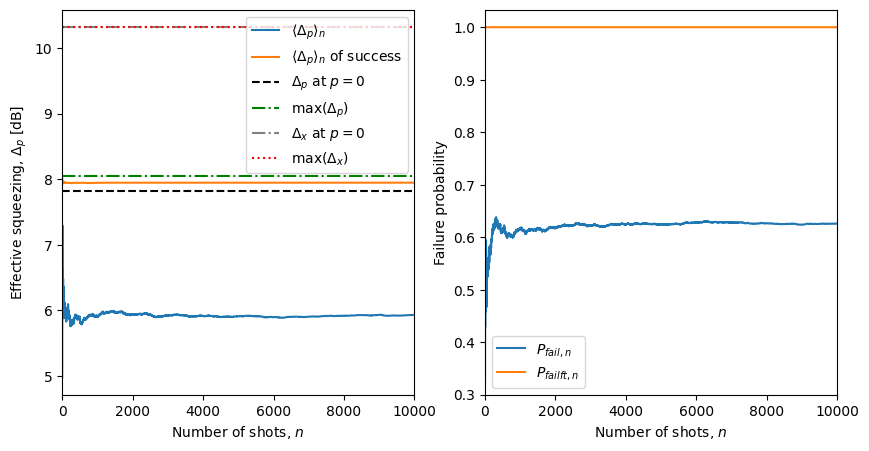

num 4, eta 0.96


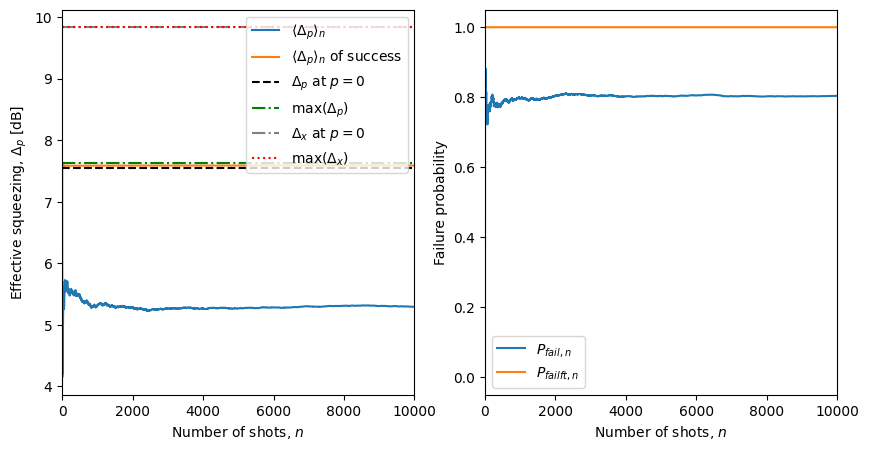

num 4, eta 0.95


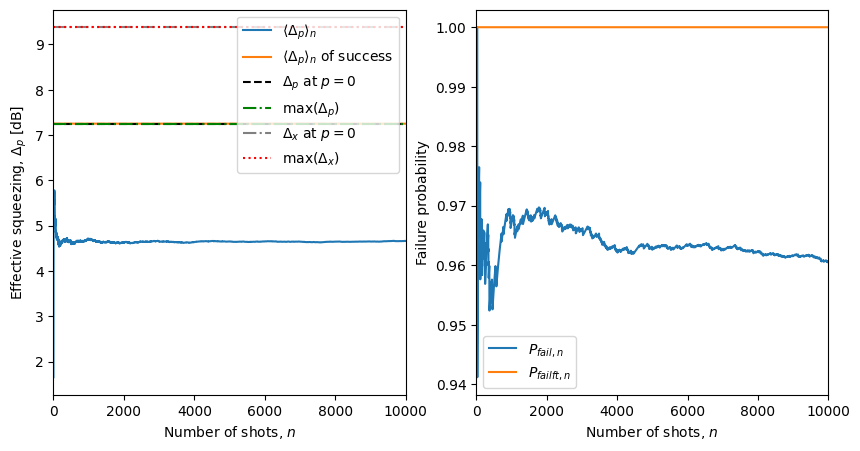

num 5, eta 1.0


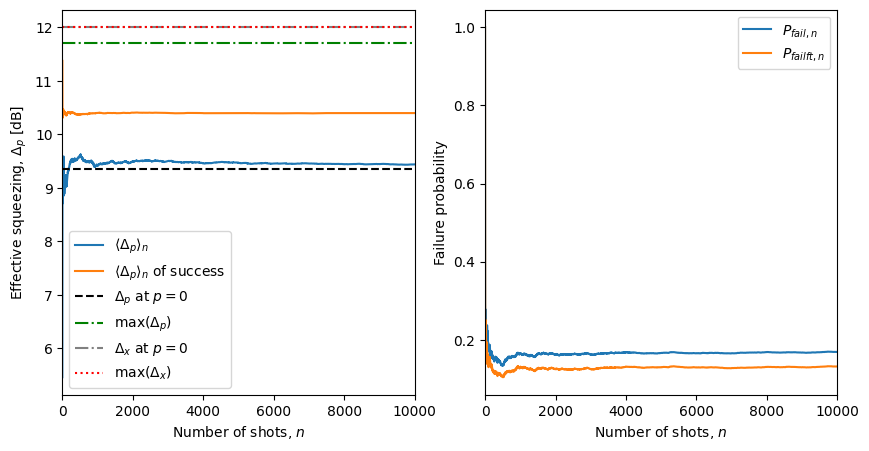

num 5, eta 0.99


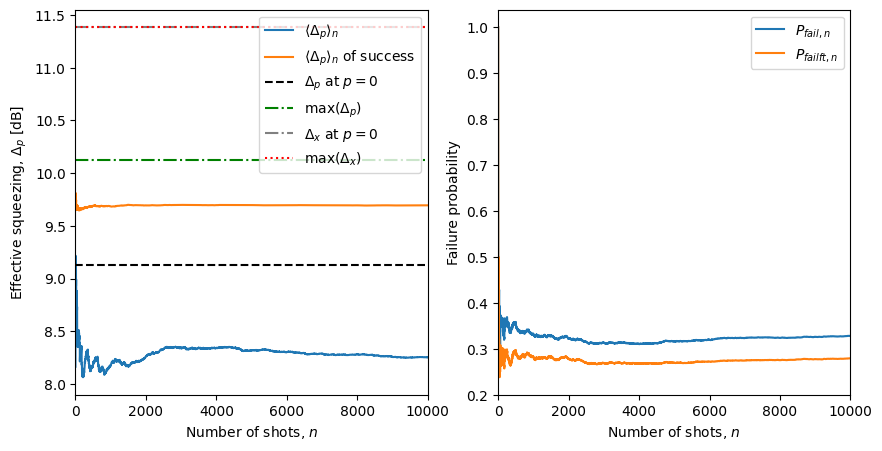

num 5, eta 0.98


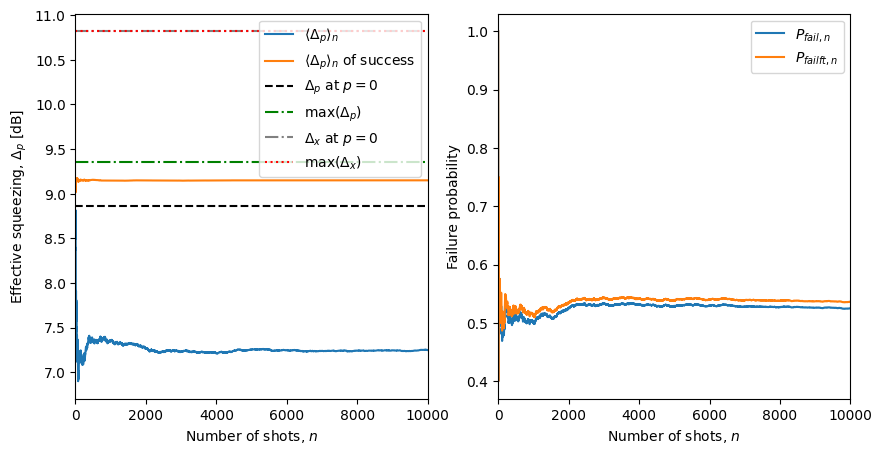

num 5, eta 0.97


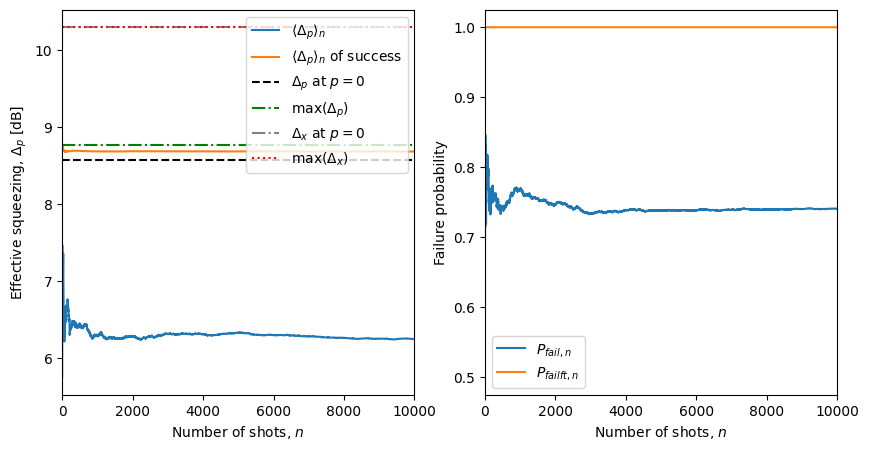

num 5, eta 0.96


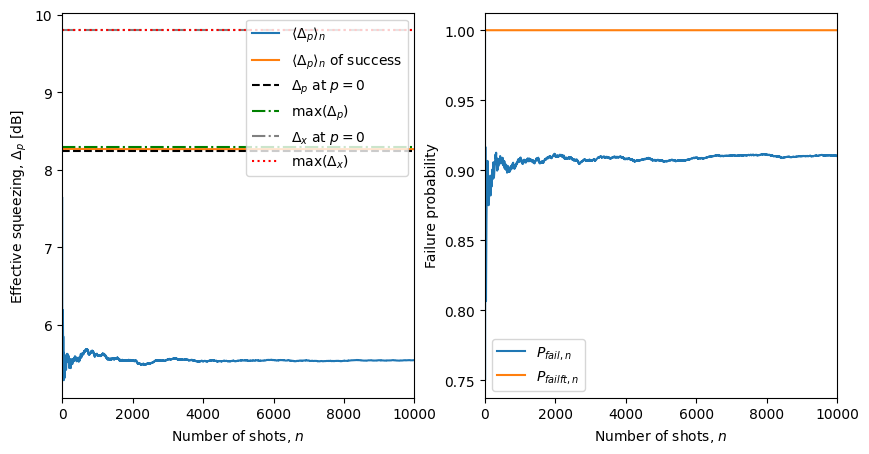

num 5, eta 0.95


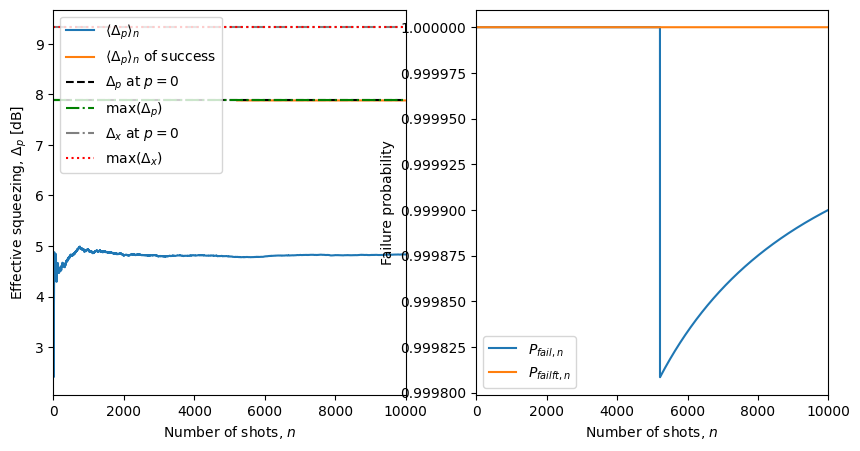

num 6, eta 1.0


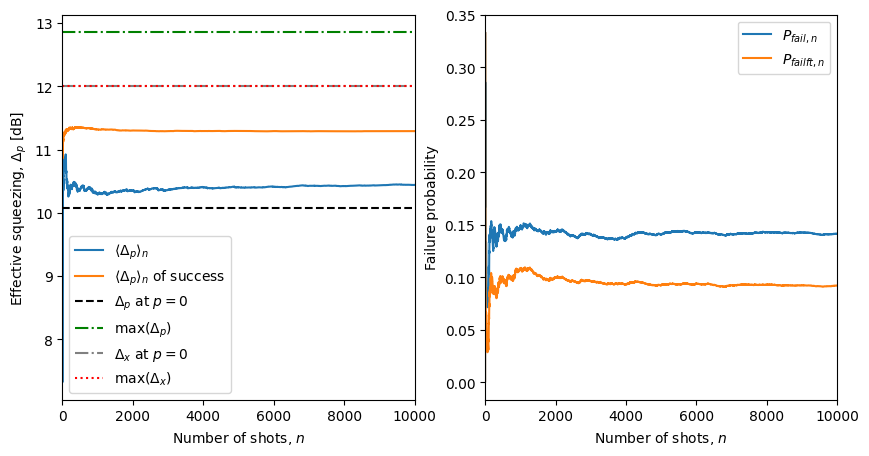

num 6, eta 0.99


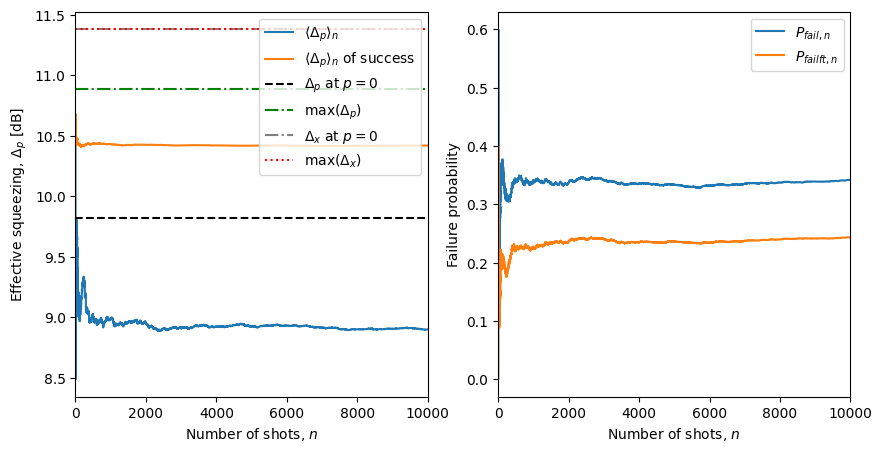

num 6, eta 0.98


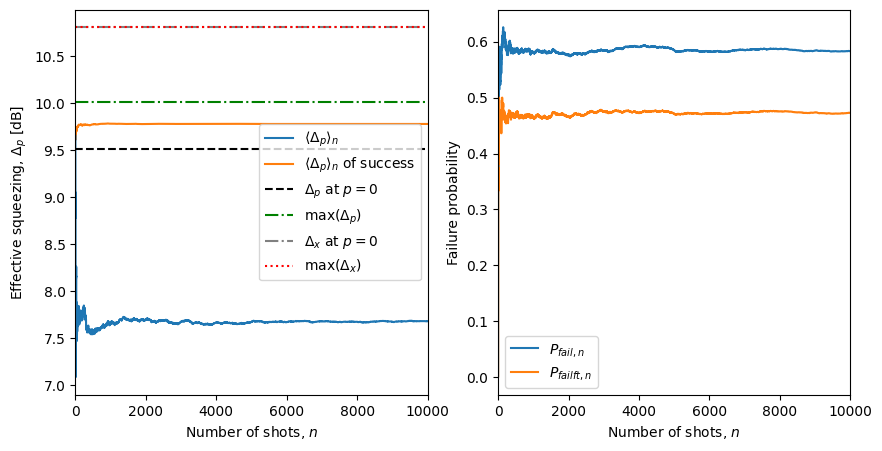

num 6, eta 0.97


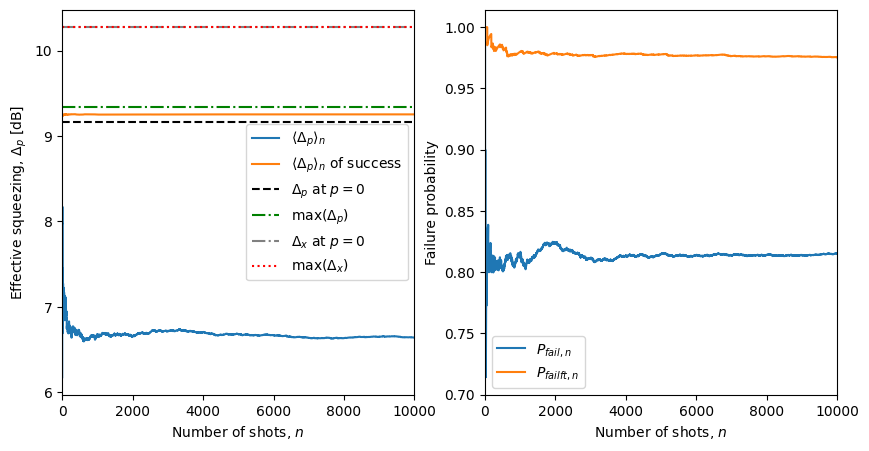

num 6, eta 0.96


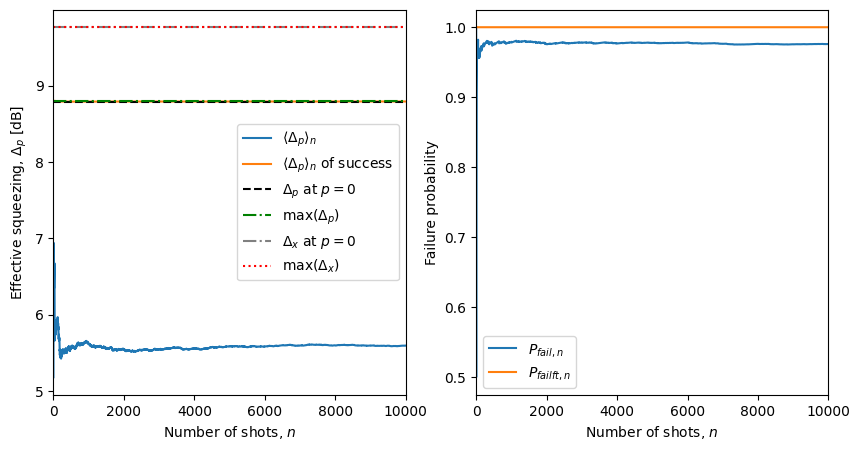

num 6, eta 0.95


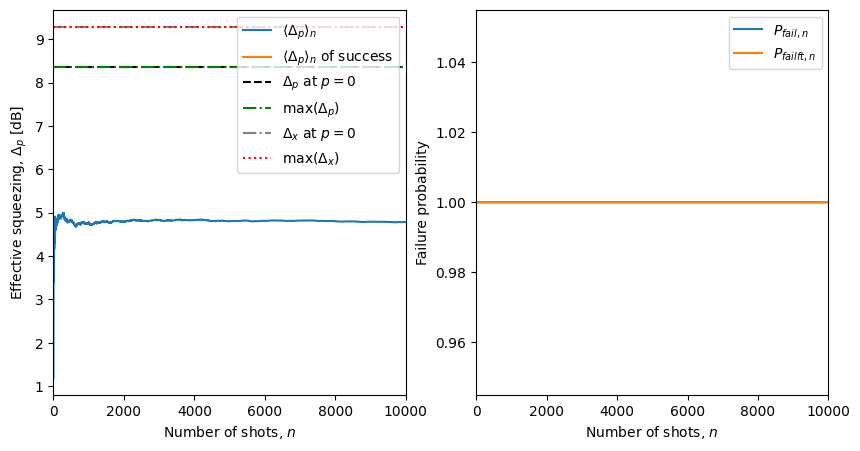

num 7, eta 1.0


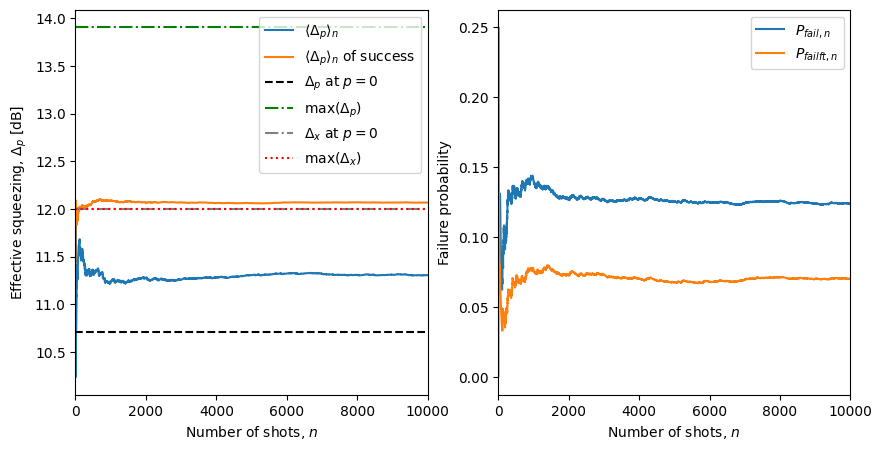

num 7, eta 0.99


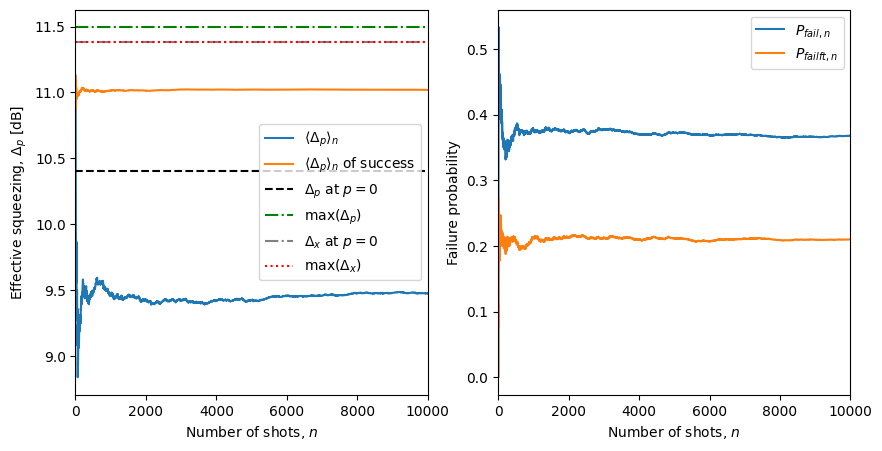

num 7, eta 0.98


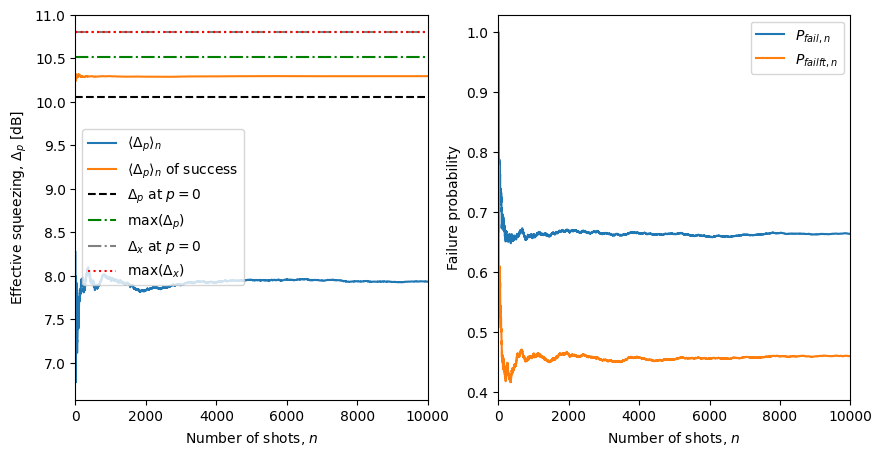

num 7, eta 0.97


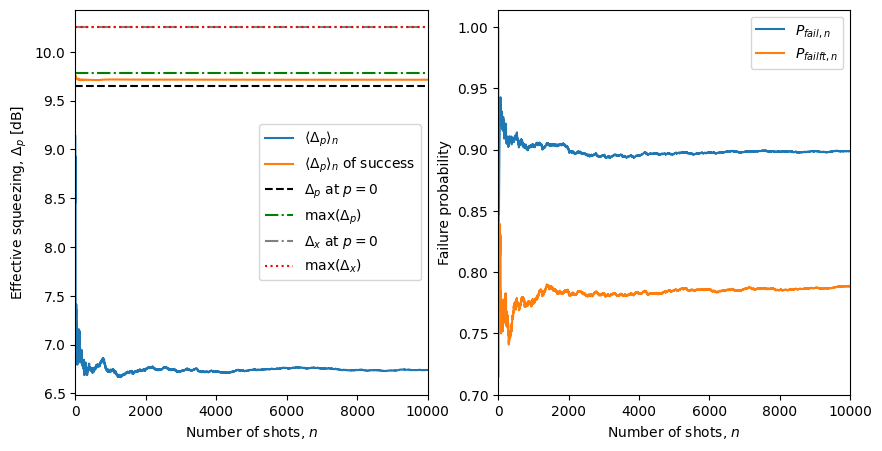

num 7, eta 0.96


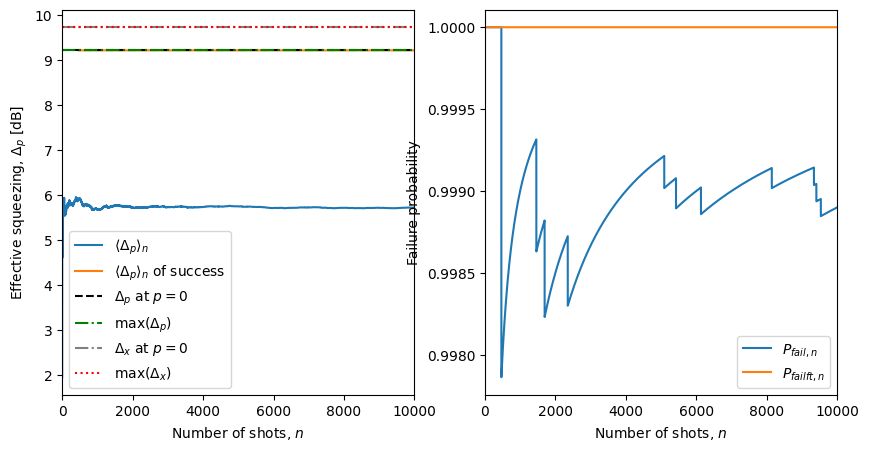

num 7, eta 0.95


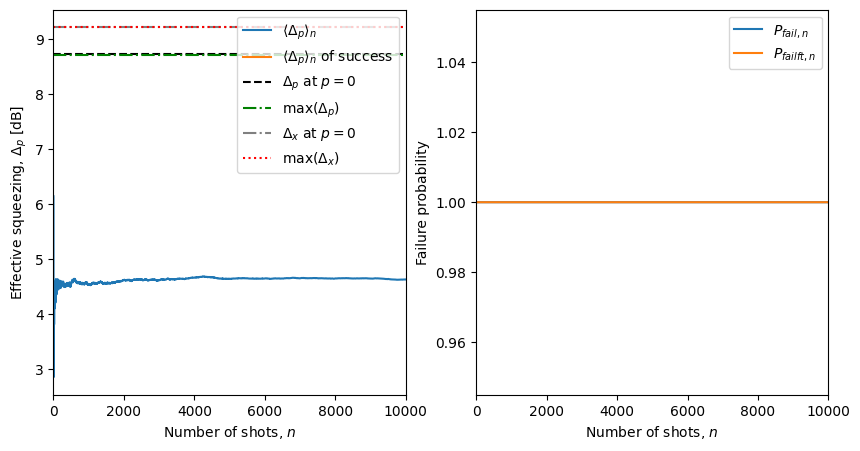

num 8, eta 1.0


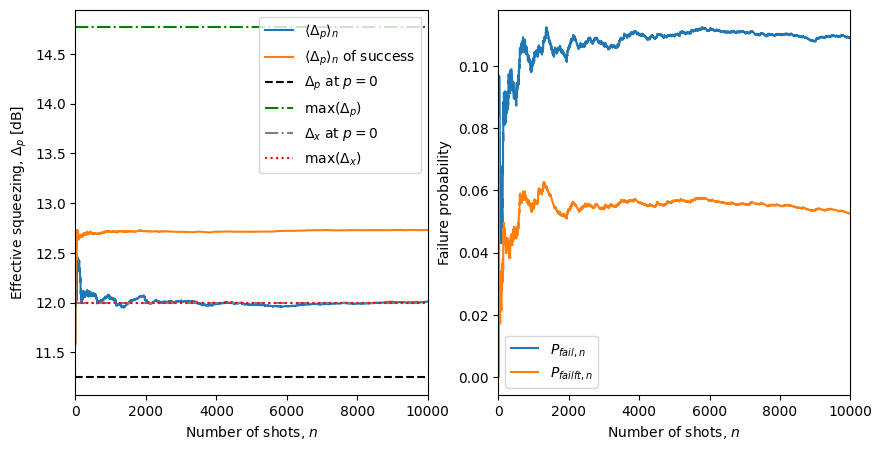

num 8, eta 0.99


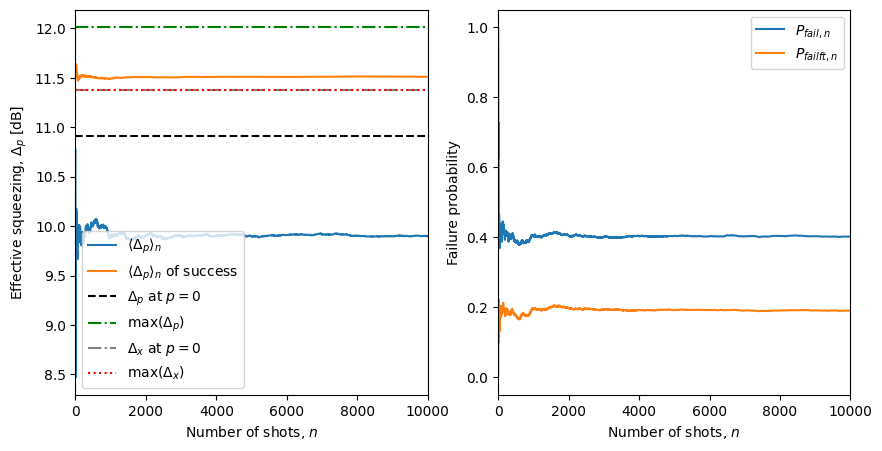

num 8, eta 0.98


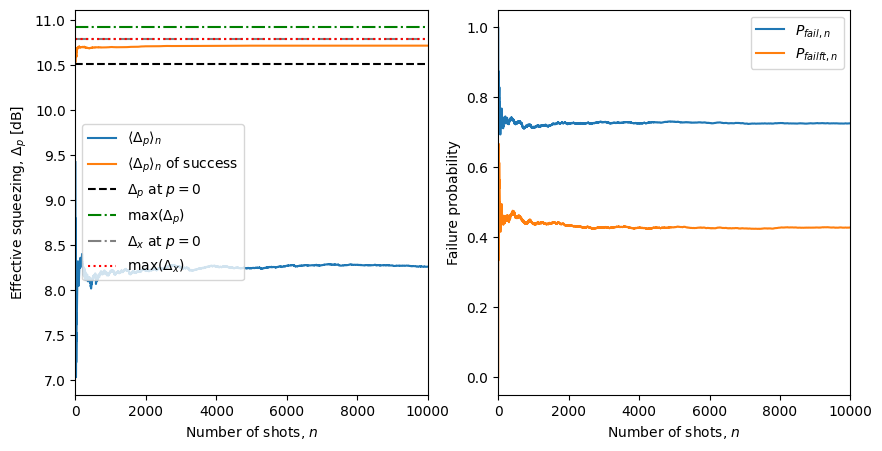

num 8, eta 0.97


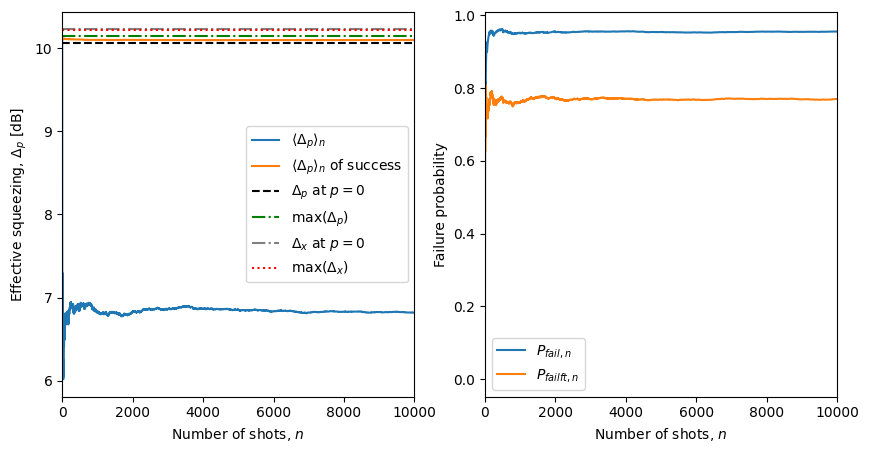

num 8, eta 0.96


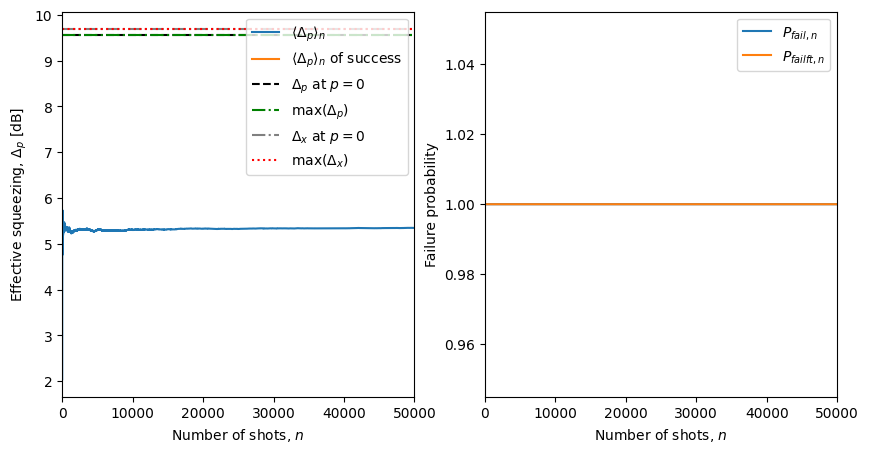

num 8, eta 0.95


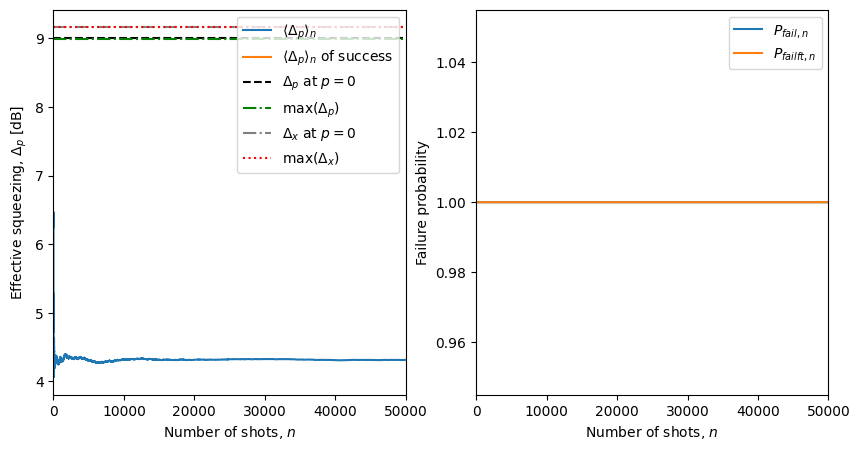

num 9, eta 1.0


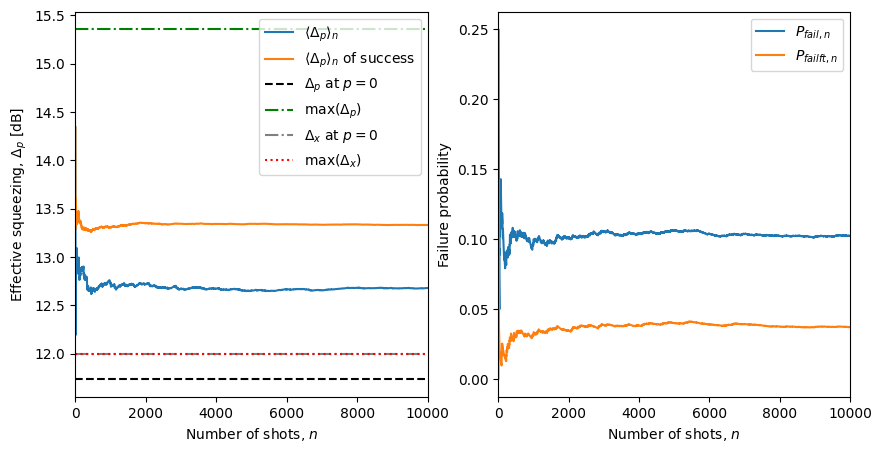

num 9, eta 0.99


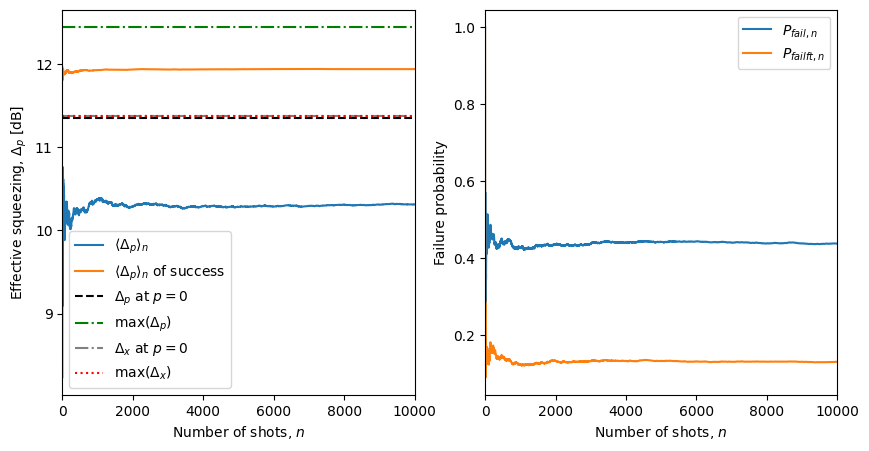

num 9, eta 0.98


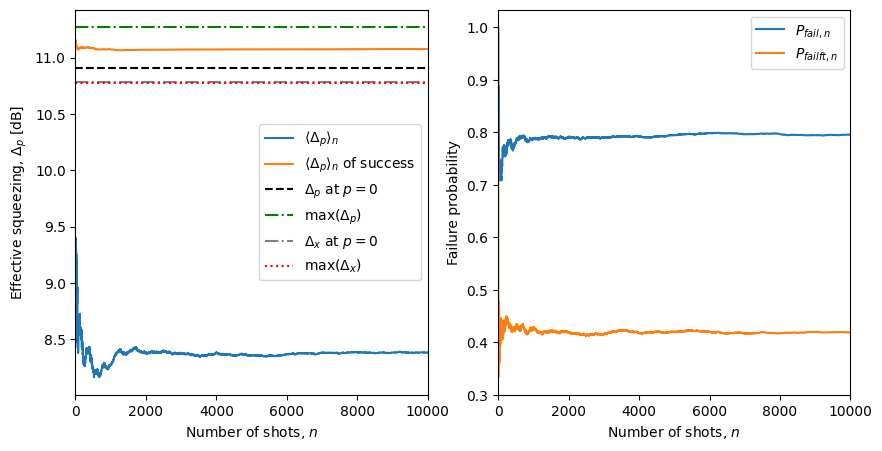

num 9, eta 0.97


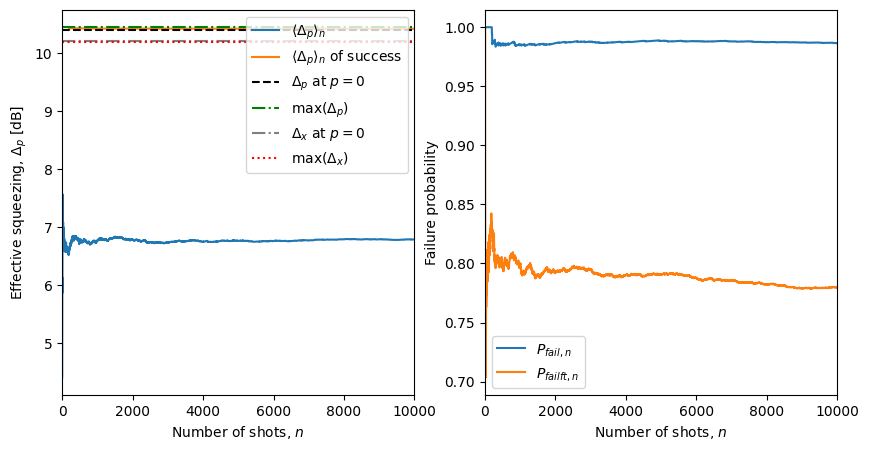

num 9, eta 0.96


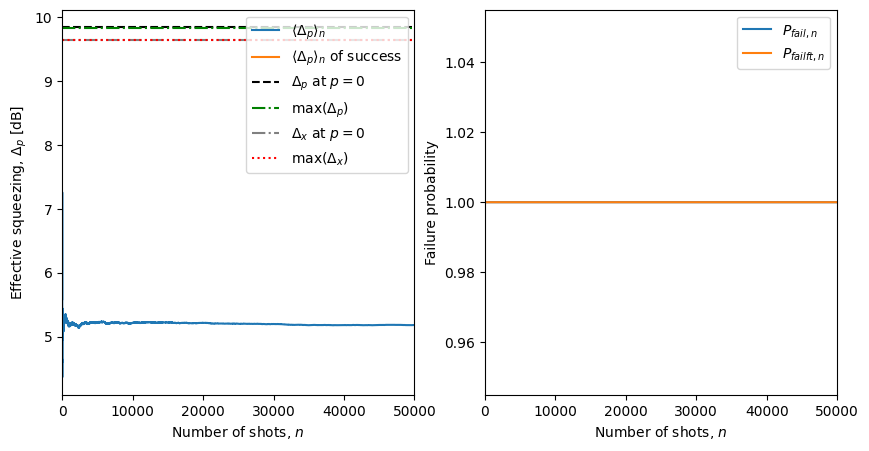

num 9, eta 0.95


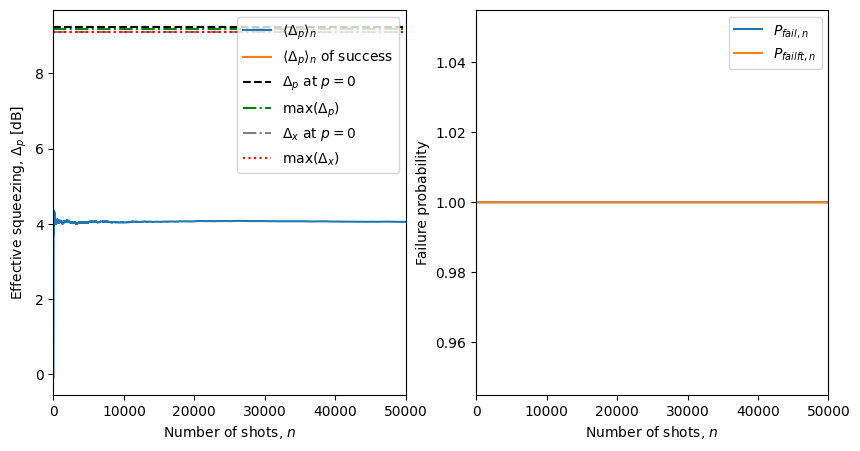

num 10, eta 1.0


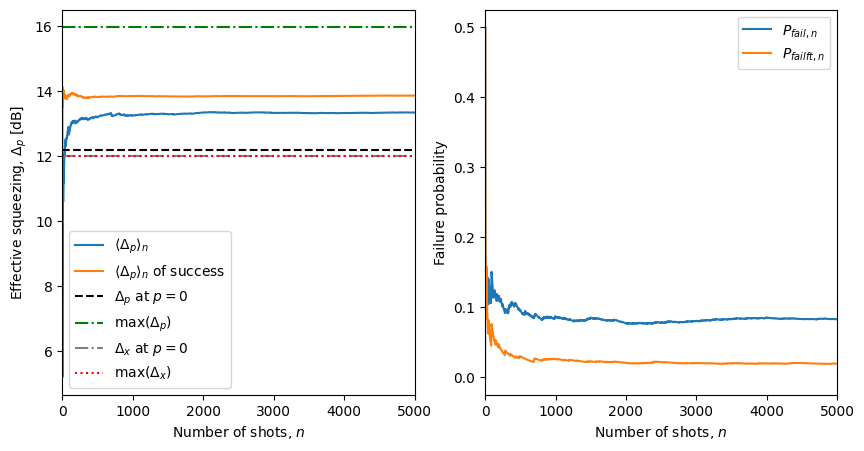

num 10, eta 0.99


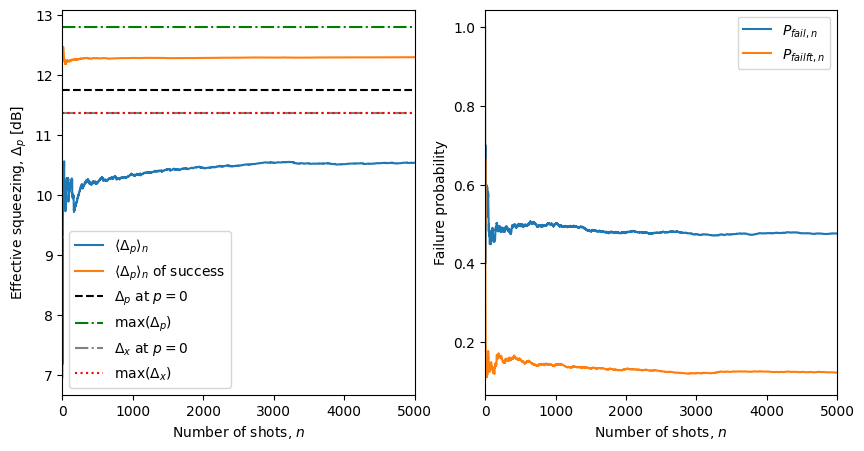

num 10, eta 0.98


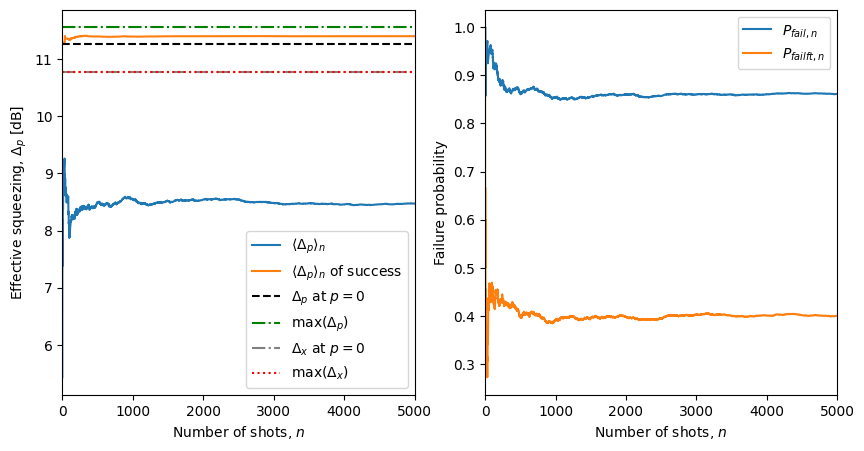

num 10, eta 0.97


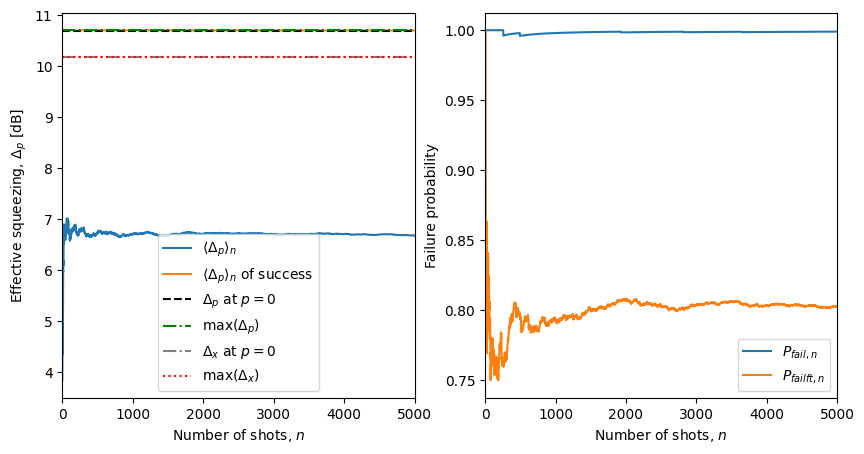

num 10, eta 0.96


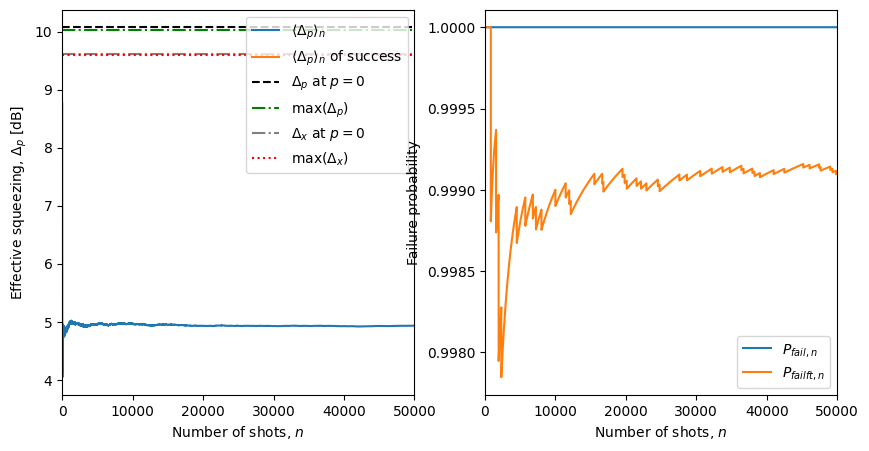

num 10, eta 0.95


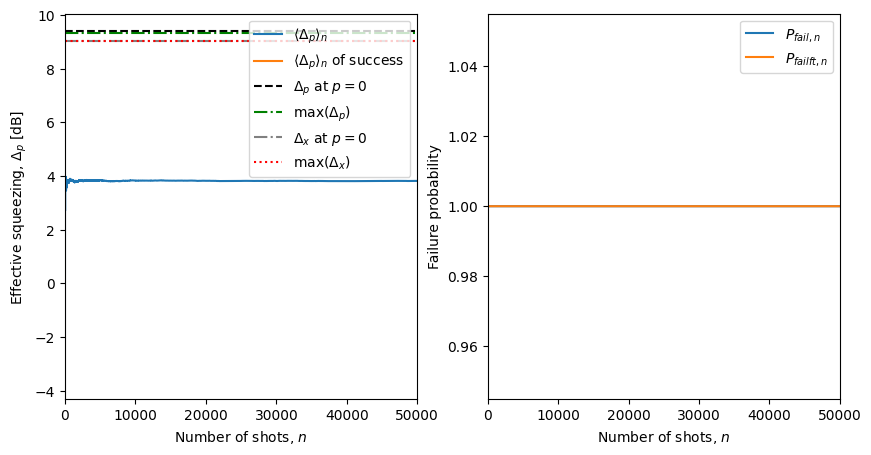

num 11, eta 1.0


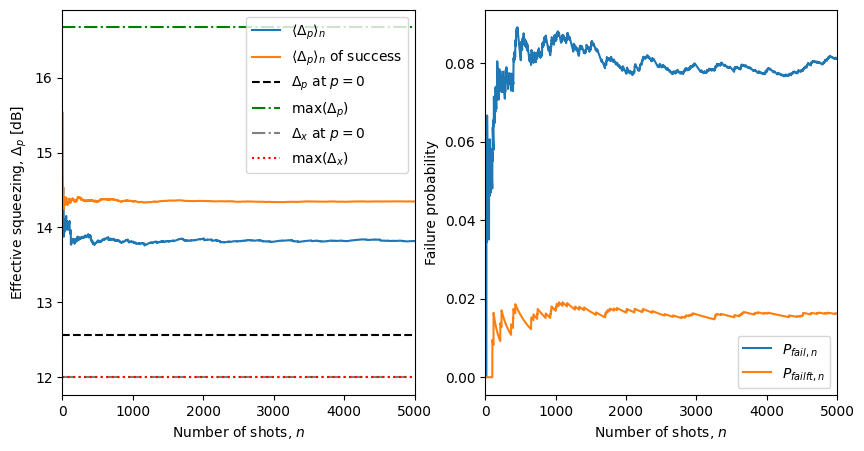

num 11, eta 0.99


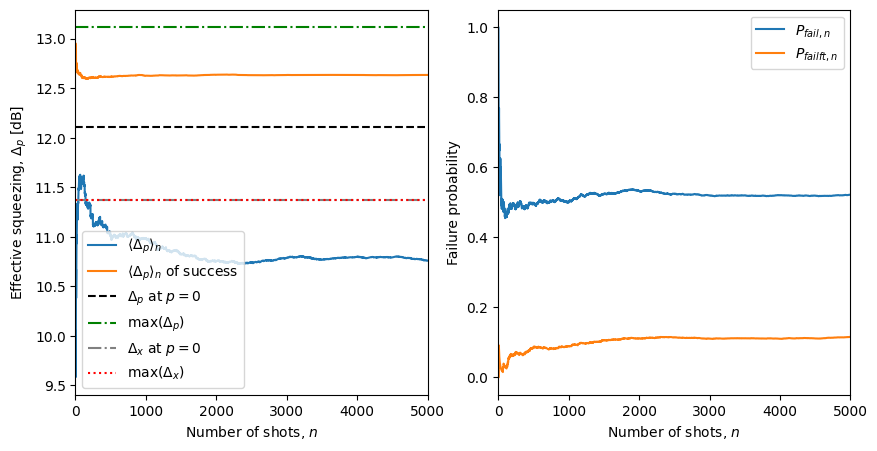

num 11, eta 0.98


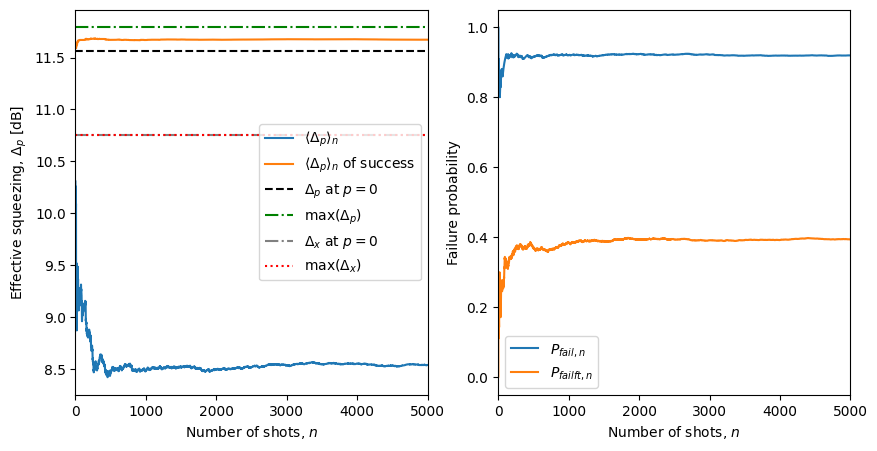

num 11, eta 0.97


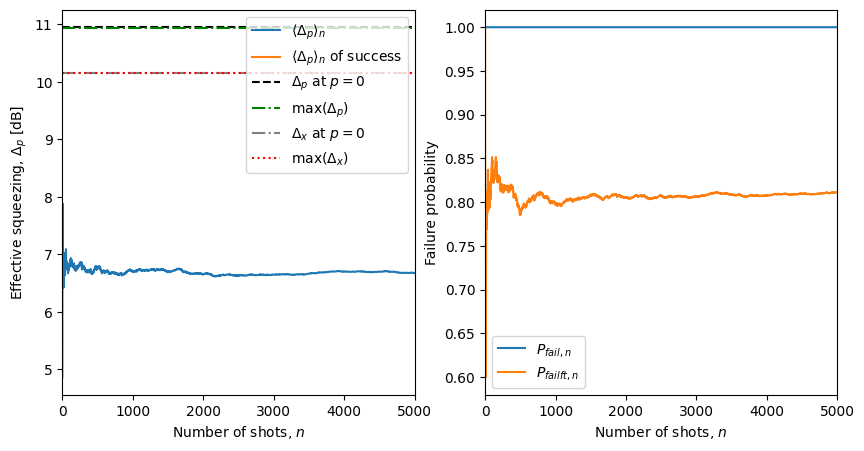

num 11, eta 0.96


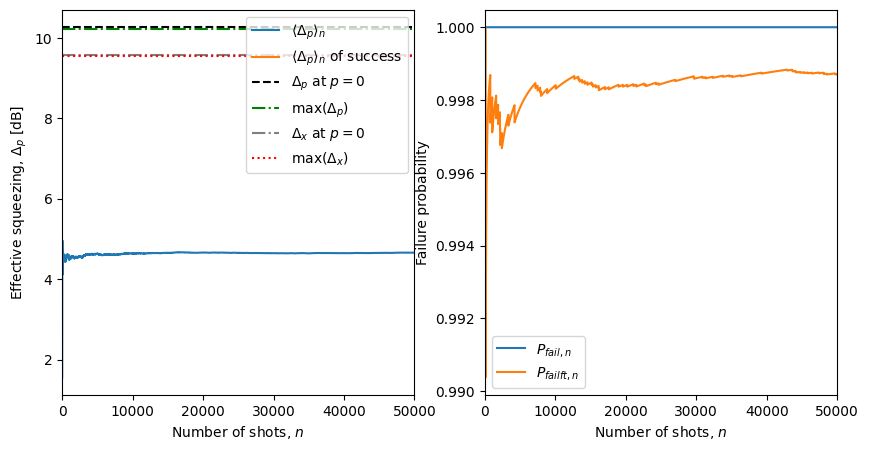

num 11, eta 0.95


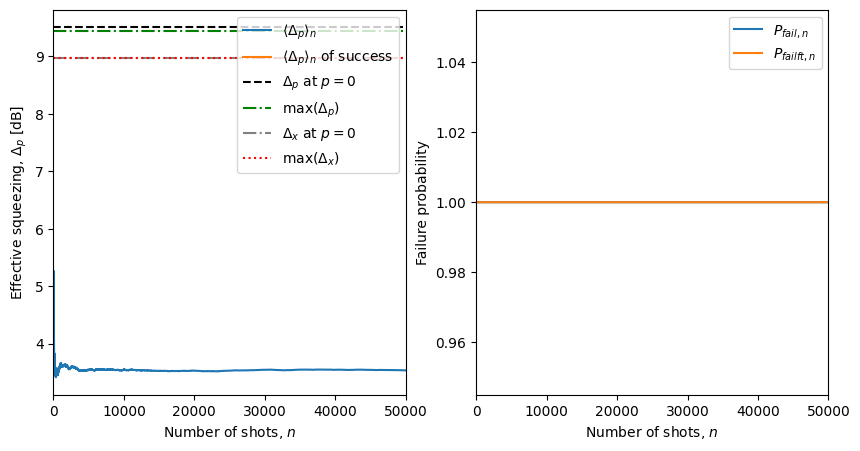

num 12, eta 1.0


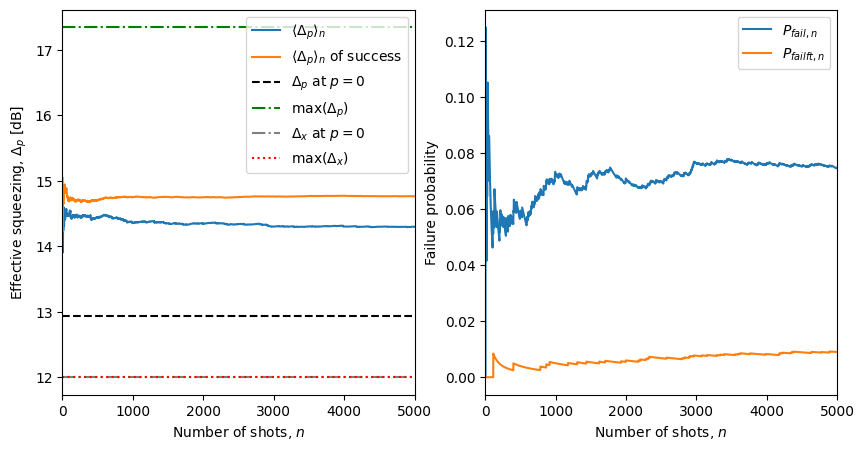

num 12, eta 0.99


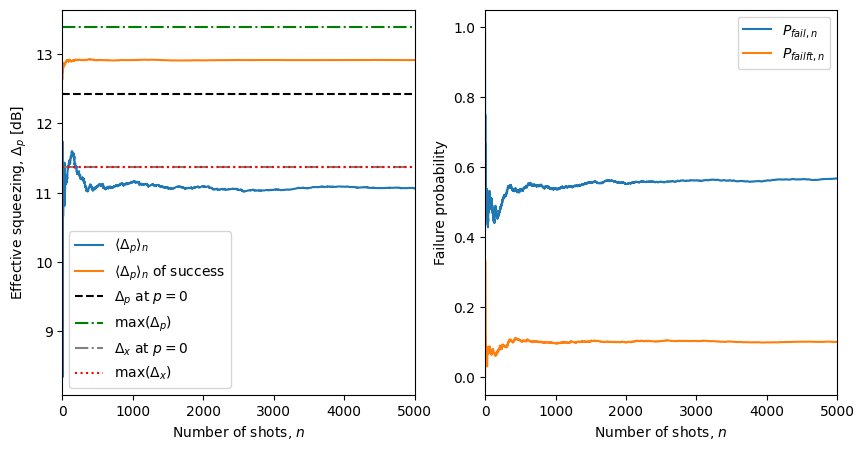

num 12, eta 0.98


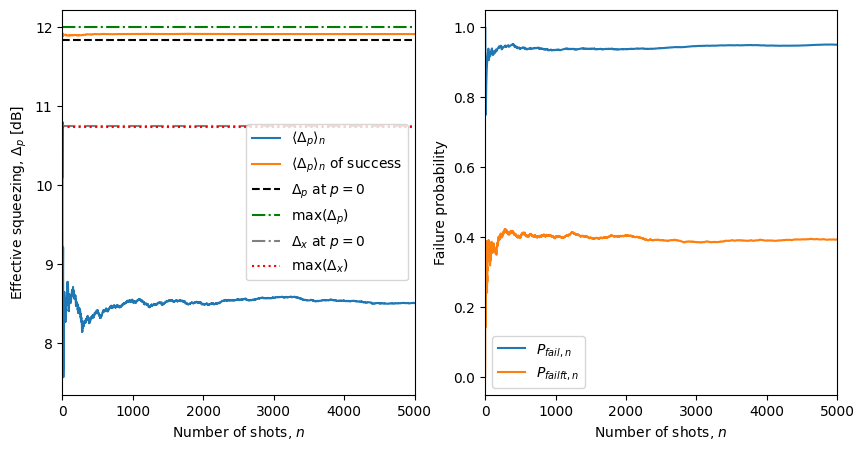

num 12, eta 0.97


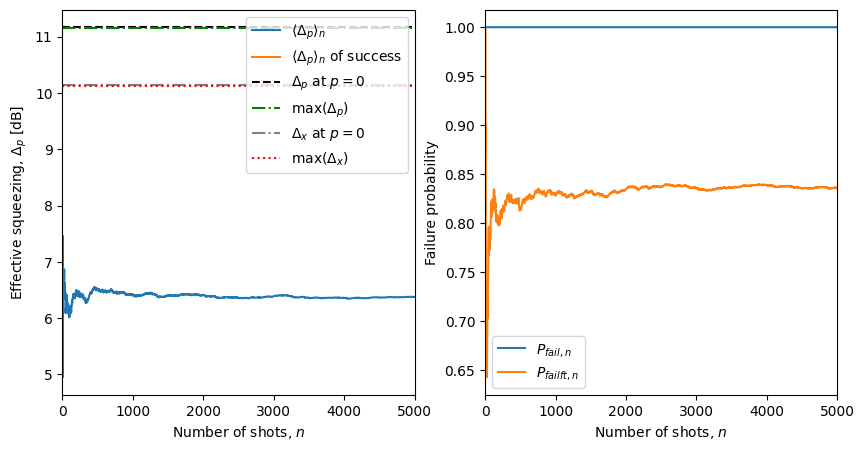

num 12, eta 0.96


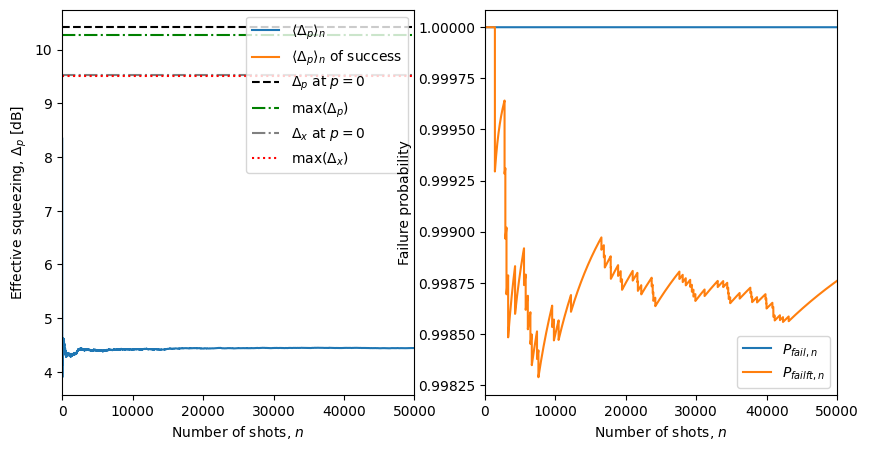

num 12, eta 0.95


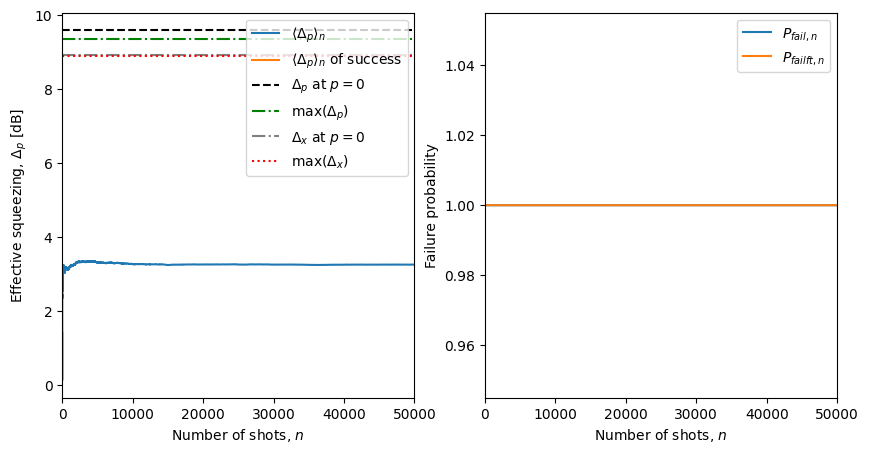

num 13, eta 1.0


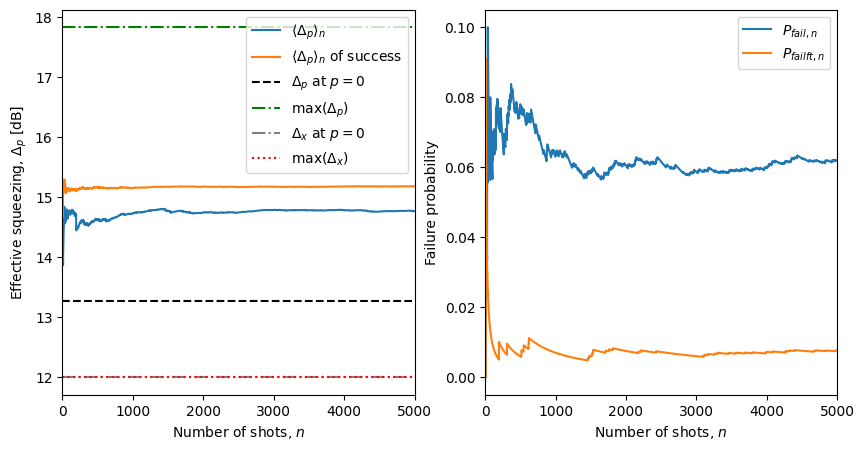

num 13, eta 0.99


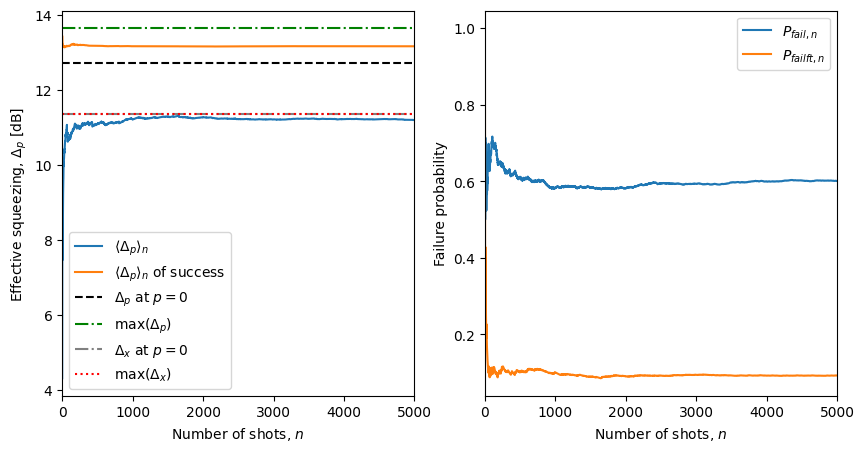

num 13, eta 0.98


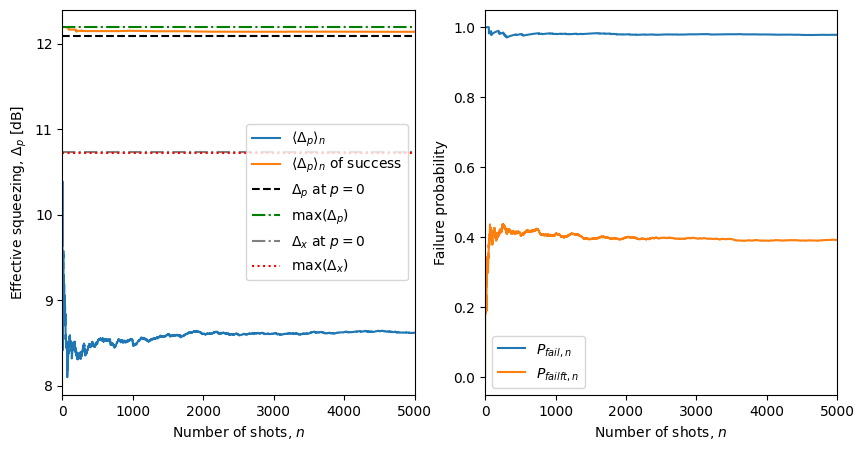

num 13, eta 0.97


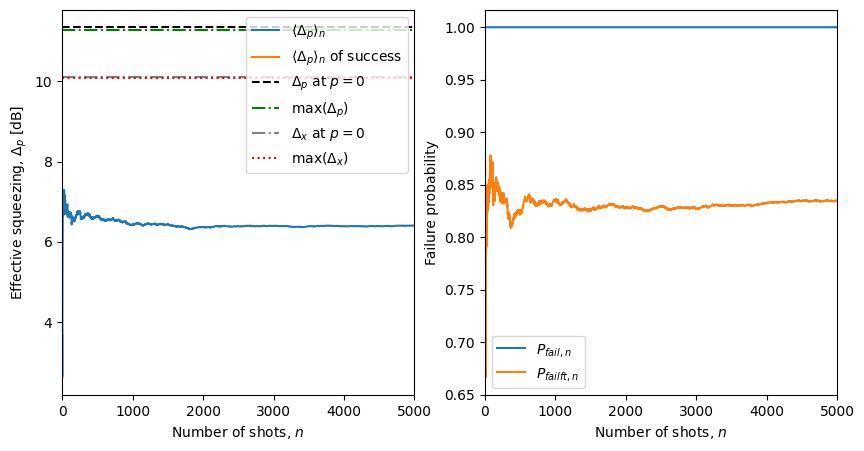

num 13, eta 0.96


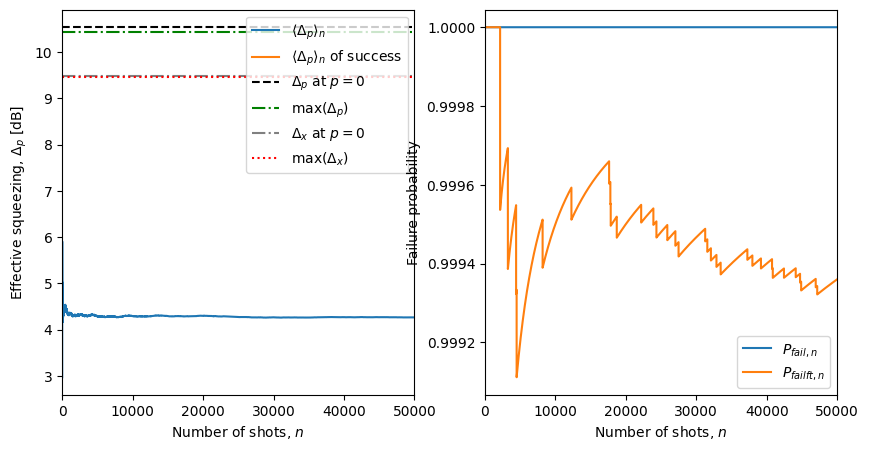

num 13, eta 0.95


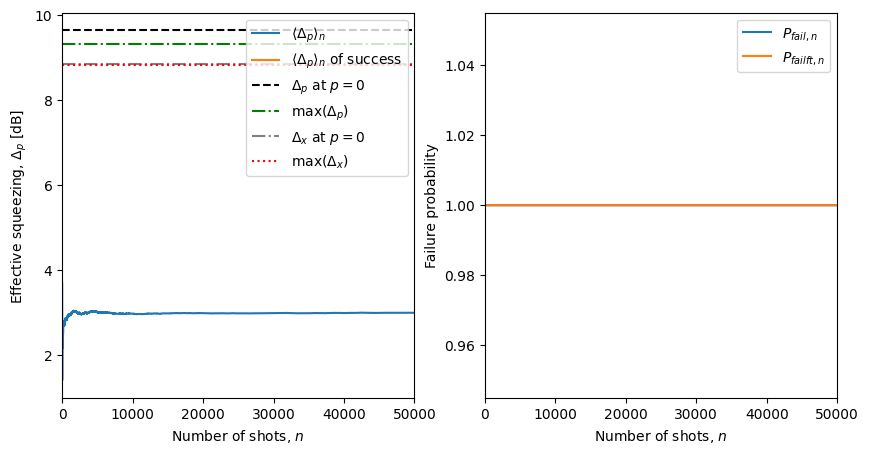

In [4]:
r_dB = -12

ns = range(2,14)
etas = np.array([1, 0.99, 0.98, 0.97, 0.96, 0.95])
parity = 0

ft_th = dB_to_Delta(9.75)
print('ft_threshold', ft_th)

failrates = np.zeros((len(ns), len(etas)))
failrates_ft = np.zeros((len(ns), len(etas)))
dpavg = np.zeros((len(ns), len(etas)))
dxavg = np.zeros((len(ns), len(etas)))
dyavg = np.zeros((len(ns), len(etas)))
dp0 = np.zeros((len(ns), len(etas)))
dp_std = np.zeros((len(ns), len(etas)))
dx_std = np.zeros((len(ns), len(etas)))
dy_std = np.zeros((len(ns), len(etas)))
fail_std = np.zeros((len(ns), len(etas)))
fail_ft_std = np.zeros((len(ns), len(etas)))

dy_min  = np.zeros((len(ns), len(etas)))
dy_max = np.zeros((len(ns), len(etas)))


for k, num in enumerate(ns):
    for l, eta in enumerate(etas): 
        print(f'num {num}, eta {eta}')
        samples = np.load(f'samples/samples_num={num}_r={r_dB}_eta={eta}.npy')
        Dp = np.load(f'samples/Dp_num={num}_r={r_dB}_eta={eta}.npy')
        Dx = np.load(f'samples/Dx_num={num}_r={r_dB}_eta={eta}.npy')
        Dy = np.sqrt(0.5 * (Dx**2 + Dp**2)) #Symmetric effective squeezing
        shots = len(Dp)
        #Zero point Dp
        args = num, r_dB, parity, 'square', eta
        cat = get_input_sq_cat(*args)
        
        out, norm = sim_breeding_circuit(cat, num, np.pi/2*np.ones(num-1), np.zeros(num-1))
        Dp0 = effective_sqz(out, 'sp')
        Dx0 = effective_sqz(out, 'sx')

        #Compute mean using more and more of the samples
        avgp = np.zeros(shots)
        avgx = np.zeros(shots)
        avgy = np.zeros(shots)
        avg_suc = np.zeros(shots)
        fail = np.zeros(shots)
        fail_ft = np.zeros(shots)

        for i in range(shots):
            dp = Dp[0:i+1]
            dx = Dx[0:i+1]
            dy = Dy[0:i+1] #Symmetric effective squeezing
            avgp[i] = np.mean(dp)
            avgx[i] = np.mean(dx)
            avgy[i] = np.mean(dy)

            fail[i] = len(dp[dp>Dp0])/len(dp)
            fail_ft[i] = len(dy[dy > ft_th])/len(dy) 
            #fail_ft[i] = len(dp[Delta_to_dB(dp) < ft_th])/len(dp)
            avg_suc[i] = np.mean(dp[dp<=Dp0])
            

        failrates[k,l] = fail[-1]
        failrates_ft[k,l] = len(Dy[Dy > ft_th])/len(Dy)
        dpavg[k,l] = avgp[-1]
        dp_std[k,l] = np.std(Dp)
        dxavg[k,l] = avgx[-1]
        dx_std[k,l] = np.std(Dx)
        dyavg[k,l]  = avgy[-1]
        dy_std[k,l] = np.std(Dy)
        dp0[k,l] = Dp0

        dy_min[k,l] = np.min(Dy)
        dy_max[k,l] = np.max(Dy)

        fail_std[k,l] = np.std(fail)
        fail_ft_std[k,l] = np.std(fail_ft)

        #Make convergence plots

        fig, axes = plt.subplots(1,2, figsize=(10,5))
        
        axes[0].plot(Delta_to_dB(avgp), label = r'$\langle \Delta_p \rangle_n $')
        axes[1].plot(fail, label = r'$P_{fail,n}$')
        axes[1].plot(fail_ft, label = r'$P_{fail ft,n}$')
        
        axes[0].plot(Delta_to_dB(avg_suc), label = r'$\langle \Delta_p \rangle_n $ of success')
        axes[0].hlines(Delta_to_dB(Dp0), 0, shots, 'k', linestyle='dashed', label = r'$\Delta_p$ at $p=0$')
        
        axes[0].hlines(Delta_to_dB(np.min(Dp)), 0, shots, 'g', linestyle='dashdot', label = r'max$(\Delta_p)$')
        axes[0].hlines(Delta_to_dB(Dx0), 0, shots, 'gray', linestyle='dashdot', label = r'$\Delta_x$ at $p=0$')
        
        axes[0].hlines(Delta_to_dB(np.min(Dx)), 0, shots, 'r', linestyle='dotted', label = r'max$(\Delta_x)$')

        axes[0].set_xlim([0,shots])
        axes[0].set_xlabel(r'Number of shots, $n$')
        axes[0].set_ylabel(r'Effective squeezing, $\Delta_p$ [dB]')
        axes[0].legend()
        
                
        axes[1].set_xlim([0,shots])
        axes[1].set_xlabel(r'Number of shots, $n$')
        axes[1].set_ylabel(r'Failure probability')
        axes[1].legend()
        
        plt.show()

#np.save(f'samples/failrates_{r_dB}_dB.npy', failrates)
#np.save(f'samples/failrates_ft_{r_dB}_dB.npy', failrates_ft)
#np.save(f'samples/failstd_{r_dB}_dB.npy', fail_std)
#np.save(f'samples/fail_ft_std_{r_dB}_dB.npy', fail_ft_std)
#np.save(f'samples/dpavg_{r_dB}_dB.npy', dpavg)
#np.save(f'samples/dp_std_{r_dB}_dB.npy', dp_std)
#np.save(f'samples/dxavg_{r_dB}_dB.npy', dxavg)
#np.save(f'samples/dx_std_{r_dB}_dB.npy', dx_std)
#np.save(f'samples/dyavg_{r_dB}_dB.npy', dyavg)
#np.save(f'samples/dy_std_{r_dB}_dB.npy', dy_std)
#np.save(f'samples/dp0_{r_dB}_dB.npy', dp0)
#np.save(f'samples/dymin_{r_dB}_dB.npy', dy_min)
#np.save(f'samples/dymax_{r_dB}_dB.npy', dy_max)


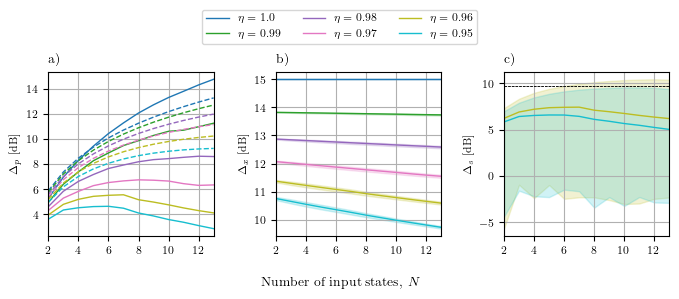

In [6]:
## Make sampling plot

r_dB= -15

failrates=np.load(f'samples/failrates_{r_dB}_dB.npy' )
failrates_ft=np.load(f'samples/failrates_ft_{r_dB}_dB.npy')
fail_std=np.load(f'samples/failstd_{r_dB}_dB.npy', )
fail_ft_std=np.load(f'samples/fail_ft_std_{r_dB}_dB.npy', )
dxavg=np.load(f'samples/dxavg_{r_dB}_dB.npy', )
dx_std=np.load(f'samples/dx_std_{r_dB}_dB.npy', )
dpavg=np.load(f'samples/dpavg_{r_dB}_dB.npy', )
dp_std=np.load(f'samples/dp_std_{r_dB}_dB.npy', )
dyavg = np.load(f'samples/dyavg_{r_dB}_dB.npy', )
dy_std=np.load(f'samples/dy_std_{r_dB}_dB.npy', )
dp0=np.load(f'samples/dp0_{r_dB}_dB.npy', )
dymin = np.load(f'samples/dymin_{r_dB}_dB.npy', )

dymax = np.load(f'samples/dymax_{r_dB}_dB.npy', )

cmap = sns.color_palette('tab10', as_cmap = True)
lw = 1

n_lines = len(etas)
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, n_lines))

mpl.rcParams.update({'font.size': 8, "text.usetex": True, 'font.family':'serif'})


fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(2*colwidth,2.5), sharex=True)

for l, eta in enumerate(etas):
    
    ax1.plot(ns, Delta_to_dB(dpavg[:,l]),color = colors[l], linewidth=lw, label = rf'$\eta={eta}$')
    #axes[1].fill_between(ns, dpavg[:,l]-dp_std[:,l],dpavg[:,l]+dp_std[:,l],color = colors[l], alpha = 0.2)
    ax1.plot(ns, Delta_to_dB(dp0[:,l]), linestyle='dashed', color=colors[l], linewidth=lw)

    ax2.plot(ns, Delta_to_dB(dxavg[:,l]),color = colors[l], linewidth=lw)
    ax2.fill_between(ns, Delta_to_dB(dxavg[:,l]-dx_std[:,l]),Delta_to_dB(dxavg[:,l]+dx_std[:,l]),color = colors[l], alpha = 0.2)
    
    #ax2.plot(ns, Delta_to_dB(dp0[:,l]), linestyle='dotted', color=colors[l], linewidth=lw)
    if l == 4 or l == 5:
        ax3.plot(ns, Delta_to_dB(dyavg[:,l]),color = colors[l], linewidth=lw)
        ax3.fill_between(ns, Delta_to_dB(dymin[:,l]),Delta_to_dB(dymax[:,l]),color = colors[l], alpha=0.2)
        ax3.hlines(9.75, 2,13, linestyle='dashed', color = 'k', linewidth = 0.5)



ax1.set_xlim([2,13])
#ax2.set_ylim([8.5,12.5])
ax1.grid('on')
ax1.set_title('a)',loc='left')
ax2.set_title('b)',loc='left')
ax3.set_title('c)',loc='left')

ax1.set_xticks(range(2,14,2))

#axes[1].supxlabel(r'Number of input states, $N$')

lbl = fig.supxlabel(r'Number of input states, $N$')

ax1.set_ylabel(r'$\Delta_p$ [dB]')
ax2.set_ylabel(r'$\Delta_x$ [dB]')
ax3.set_ylabel(r'$\Delta_s$ [dB]')
ax2.grid('on')
ax3.grid('on')

#axes[0].legend(frameon = False, loc = 'upper center', bbox_to_anchor=(-0.75,0.9), ncol = 6)
lgd = fig.legend(frameon=True, loc='upper center', bbox_to_anchor=(0.5,1.15), ncol=3)



#axes[1].legend(frameon=True, loc='upper center', bbox_to_anchor=(-0.15, 1.5),
               #fancybox=True, shadow=True, ncol=3)
plt.tight_layout()
plt.savefig(f'figures/sample_res_plot_{r_dB}_dB_9.75.pdf', bbox_extra_artists=(lgd,lbl), bbox_inches='tight')
plt.show()

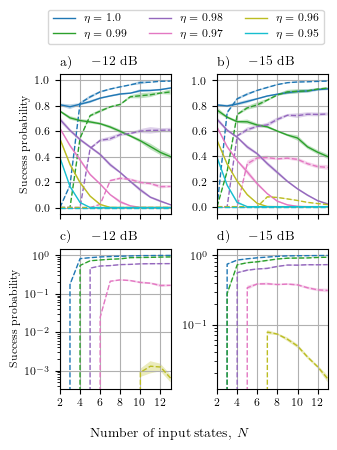

In [7]:
#Zoom in on low probs

r_dB= -12
failrates_ft_12=np.load(f'samples/failrates_ft_{r_dB}_dB.npy')
fail_ft_std_12=np.load(f'samples/fail_ft_std_{r_dB}_dB.npy', )
failrates_12=np.load(f'samples/failrates_{r_dB}_dB.npy' )
fail_std_12=np.load(f'samples/failstd_{r_dB}_dB.npy', )

r_dB= -15
failrates_ft_15=np.load(f'samples/failrates_ft_{r_dB}_dB.npy')
fail_ft_std_15=np.load(f'samples/fail_ft_std_{r_dB}_dB.npy', )
failrates_15=np.load(f'samples/failrates_{r_dB}_dB.npy' )
fail_std_15=np.load(f'samples/failstd_{r_dB}_dB.npy', )

cmap = sns.color_palette('tab10', as_cmap = True)
lw = 1

n_lines = len(etas)
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, n_lines))

mpl.rcParams.update({'font.size': 8, "text.usetex": True, 'font.family':'serif'})


fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(colwidth,4), sharex=True)

for l, eta in enumerate(etas):

    ax1.plot(ns, 1-failrates_12[:,l], color = colors[l], label = rf'$\eta={eta}$', linewidth=lw)
    ax1.fill_between(ns, 1-(failrates_12[:,l]-fail_std_12[:,l]), 1-(failrates_12[:,l]+fail_std_12[:,l]), color=colors[l], alpha = 0.3, edgecolor=None)
    
    ax1.plot(ns, 1-failrates_ft_12[:,l], linestyle='dashed',color = colors[l], linewidth=lw)
    ax1.fill_between(ns, 1-(failrates_ft_12[:,l]-fail_ft_std_12[:,l]), 1-(failrates_ft_12[:,l]+fail_ft_std_12[:,l]), color=colors[l], alpha = 0.3, edgecolor=None)
    
    
    ax3.plot(ns, 1-failrates_ft_12[:,l], linestyle='dashed',color = colors[l], linewidth=lw)
    ax3.fill_between(ns, 1-(failrates_ft_12[:,l]-fail_ft_std_12[:,l]), 1-(failrates_ft_12[:,l]+fail_ft_std_12[:,l]), color=colors[l], alpha = 0.3, edgecolor=None)


    ax2.plot(ns, 1-failrates_15[:,l], color = colors[l], linewidth=lw)
    ax2.fill_between(ns, 1-(failrates_15[:,l]-fail_std_15[:,l]), 1-(failrates_15[:,l]+fail_std_15[:,l]), color=colors[l], alpha = 0.3, edgecolor=None)
    
    ax2.plot(ns, 1-failrates_ft_15[:,l], linestyle='dashed',color = colors[l], linewidth=lw)
    ax2.fill_between(ns, 1-(failrates_ft_15[:,l]-fail_ft_std_15[:,l]), 1-(failrates_ft_15[:,l]+fail_ft_std_15[:,l]), color=colors[l], alpha = 0.3, edgecolor=None)
    

    
    ax4.plot(ns, 1-failrates_ft_15[:,l], linestyle='dashed',color = colors[l], linewidth=lw,)
    ax4.fill_between(ns, 1-(failrates_ft_15[:,l]-fail_ft_std_15[:,l]), 1-(failrates_ft_15[:,l]+fail_ft_std_15[:,l]), color=colors[l], alpha = 0.3, edgecolor=None)
    
   


ax1.set_xlim([2,13])
ax1.set_xticks(range(2,14,2))
ax1.set_ylabel(r'Success probability')

ax3.set_ylabel(r'Success probability')


ax1.set_title('a)',loc='left')
ax1.set_title(r'$-12$ dB')
ax2.set_title('b)',loc='left')
ax2.set_title(r'$-15$ dB')

ax3.set_title(r'$-12$ dB')
ax4.set_title(r'$-15$ dB')

ax3.set_title('c)',loc='left')
ax4.set_title('d)',loc='left')

ax1.grid('on')
ax2.grid('on')
ax3.grid('on')
ax4.grid('on')

#ax1.set_yscale('log')
#ax2.set_yscale('log')
ax3.set_yscale('log')
ax4.set_yscale('log')

#axes[1].supxlabel(r'Number of input states, $N$')

lbl = fig.supxlabel(r'Number of input states, $N$')

#ax2.set_ylabel(r'$\Delta_p$ [dB]')

#axes[0].legend(frameon = False, loc = 'upper center', bbox_to_anchor=(-0.75,0.9), ncol = 6)
lgd = fig.legend(frameon=True, loc='upper center', bbox_to_anchor=(0.55,1.1), ncol=3)



#axes[1].legend(frameon=True, loc='upper center', bbox_to_anchor=(-0.15, 1.5),
               #fancybox=True, shadow=True, ncol=3)
plt.tight_layout()

plt.savefig('figures/samples_12_vs_15_dB.pdf', bbox_extra_artists=(lgd,lbl), bbox_inches='tight')
plt.show()